# Predictive maintenance of water pump

## Problem Defination:
We all know that water is a very essential service for all of us. We need water in our day to day life for many purposes and we can’t survive without water. Imagin you ware wake up early in a morning and you see that there is no water coming out from a tap, your water supply is disconnected. Such a sudden water disconnection can create a big problem for many of us like who don’t have pre-storage of water or don't have any other source of water. in such a situation if we can predict the failure of our water supply system which causes water disconnection before it happens, then we can solve that technical problem or we can give pre-notice to the consumer of that water supply system so that they can preplan themselves. In our task, we are solving a problem of predicting the failure of a water pump which causes a water supply system failure. We have a water supply system to provide water to a big town and located far from that town. We have an observation of one year in which the water pump get failed 7 times. Those failures cause a huge problem for many people and also lead to some serious living problems for some families. Some people are taking care of that water pump. they analyze all the pre-stored reading of the sensor mounted on a water pump and try to understand any pattern in reading which can cause that failure so that they can predict the next failure by detecting that pattern in reading. But they didn't found such a pattern in sensor reading. Hence they proposed this problem to solve by Machine Learning. They have provided data of one year which is a reading of 52 sensors taken after each 1-minute interval and also has provided water pump status for that time. In this task at the current time, we have to predict future system failure by using past data. 

## Data Information:
Source: https://www.kaggle.com/nphantawee/pump-sensor-data
<br /> In our dataset, we have data from 51 sensors that are time-series data. We have a feature called ‘timestamp’ which shows the time at which reading of sensors is taken. ‘machine_status’ is our actual class labels.

## ML Problem Formulation
<p><b> Time-series forecasting and binary Classification</b></p>
we are going to predict future failure of the water pump. if there is a failure then our class label should be 1 else it should be 0.

## Performance metrics
1. Recall.
  - we want to predict all the failure, that means we want a high true positive rate.
  - we can tolerate false positive but we can't tolerate false negative.
  - Recall is more important than precision in our case.

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
#import seaborn as sns
import os

In [2]:
data=pd.read_csv('sensor.csv')
print(data.head(3))
print('all class labels:',data['machine_status'].unique())

   Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
1           1  2018-04-01 00:01:00   2.465394   47.09201    53.2118   
2           2  2018-04-01 00:02:00   2.444734   47.35243    53.2118   

   sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
0   46.31076   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
1   46.31076   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
2   46.39757   638.8889   73.54598   13.32465   16.03733  ...   41.66666   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
1  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
2  39.351852   65.39352   51.21528  38.194443   155.9606   67.12963   

   sensor_50  sensor_51  machine_status  
0   243.0556   201.3889          NORMAL  
1   243.0556   201.3889          NORMAL  

## Data Checking for NULL vlaues

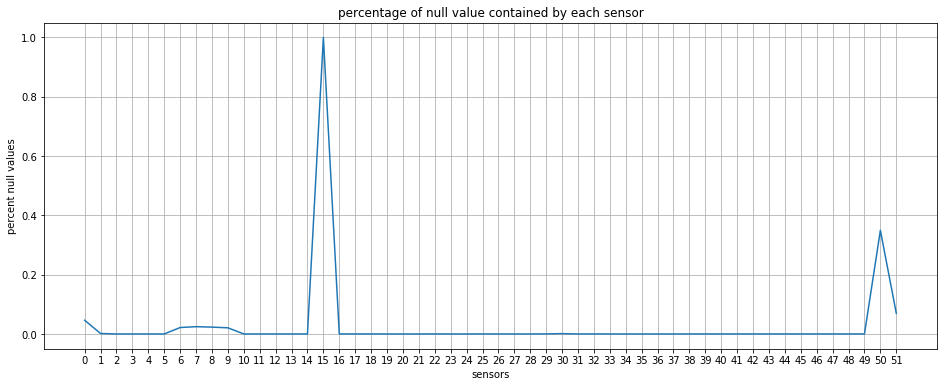

NA values per sensor in percent:
 sensor_00    0.046333
sensor_01    0.001675
sensor_02    0.000086
sensor_03    0.000086
sensor_04    0.000086
sensor_05    0.000086
sensor_06    0.021777
sensor_07    0.024741
sensor_08    0.023180
sensor_09    0.020856
sensor_10    0.000086
sensor_11    0.000086
sensor_12    0.000086
sensor_13    0.000086
sensor_14    0.000095
sensor_15    1.000000
sensor_16    0.000141
sensor_17    0.000209
sensor_18    0.000209
sensor_19    0.000073
sensor_20    0.000073
sensor_21    0.000073
sensor_22    0.000186
sensor_23    0.000073
sensor_24    0.000073
sensor_25    0.000163
sensor_26    0.000091
sensor_27    0.000073
sensor_28    0.000073
sensor_29    0.000327
sensor_30    0.001185
sensor_31    0.000073
sensor_32    0.000309
sensor_33    0.000073
sensor_34    0.000073
sensor_35    0.000073
sensor_36    0.000073
sensor_37    0.000073
sensor_38    0.000123
sensor_39    0.000123
sensor_40    0.000123
sensor_41    0.000123
sensor_42    0.000123
sensor_43    0.00012

In [3]:
null=data.iloc[:,2:-1].isna().sum()/data.shape[0] # #_null_vlaues_per_column/total_#_data_point
x=np.arange(0,52)
y=np.array(null)
fig=plt.figure(num=None, figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(x)
plt.plot(x,y)
plt.title('percentage of null value contained by each sensor')
plt.xlabel('sensors')
plt.ylabel('percent null values')
plt.grid()
plt.show()
print('NA values per sensor in percent:\n',null)

- Above we show the percentage of null values contained by each column.
- We can see that each column contains some amount of null values.
- Most of the column has very few null values, in sensor_15, all values are null and for sensor_50 we have 34% null values.
- It is better to remove sensor_15 because it doesn't contain any information.

In [4]:
data.drop(['sensor_15','Unnamed: 0'],inplace=True,axis=1)#removing column 'sensor_15' because it has all null value. 

In [5]:
data.duplicated().any() #checking of duplicate rows

False

- No duplicate values, hence we don't need to remove any row.

## EDA

### Analyzing NA values

- We want to check that is NA giving us any information to predict the class label or not.
- For any column, if all the NA values are belonging to only one class, hence we can say that NA values in that column are very helpful to classify our data. 
- Below we are plotting bar graph for columns having a large number of NA values.

sensor_00 :
 RECOVERING    10194
NORMAL           14
Name: machine_status, dtype: int64
sensor_06 :
 RECOVERING    4784
NORMAL          14
Name: machine_status, dtype: int64
sensor_07 :
 RECOVERING    5437
NORMAL          14
Name: machine_status, dtype: int64
sensor_08 :
 RECOVERING    5093
NORMAL          14
Name: machine_status, dtype: int64
sensor_09 :
 RECOVERING    4581
NORMAL          14
Name: machine_status, dtype: int64
sensor_50 :
 NORMAL        76936
RECOVERING       80
BROKEN            1
Name: machine_status, dtype: int64
sensor_51 :
 NORMAL        12384
RECOVERING     2998
BROKEN            1
Name: machine_status, dtype: int64


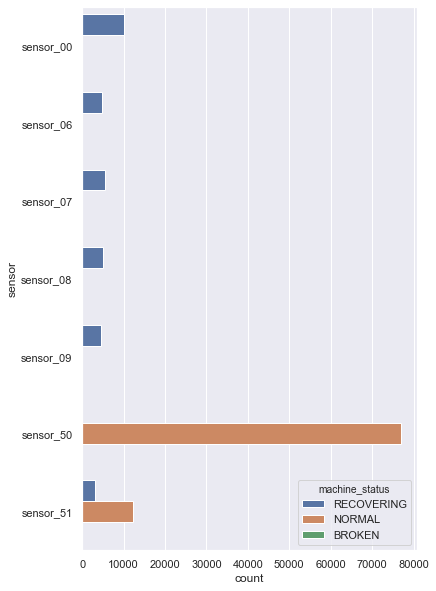

In [6]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html to plot bar graph
na_count=pd.DataFrame(columns=['sensor','machine_status']) #making datafram to plot bar graph
for col in data.columns[[1,7,8,9,10,50,51]]:
    df=pd.DataFrame(columns=['sensor','machine_status']) #temp dataframe to concat 
    df1 = data[data[col].isna()]['machine_status'] 
    print(col,':\n',data[data[col].isna()]['machine_status'].value_counts())
    df['sensor']=[col]*(len(df1.values.tolist()))
    df['machine_status']=df1.values.tolist()
    na_count = pd.concat([na_count,df])

fig=plt.figure(num=None, figsize=(6, 10))
sns.set(style="darkgrid")
ax = sns.countplot(y='sensor', hue='machine_status', data=na_count)

- From the above plot, we did not get any column for which all NA values belong to only one class.
- For sensor_00, sensor_06, sensor_07, sensor_08, sensor_09 almost all NA values belong to 'RECOVERING' class except 14 NA values, hence for these columns, NA values are helpful to classify 'RECOVERING' class from other.
- For sensor_51 both the 3 classes are probable because we have NA values for each with a good number.
- In the above plot, we did not get more information about 'BROKEN' class because we plot only those features which have a large number of NA. if any feature has NA only for 'BROKEN' class then we can't get it here because we have only 7 data points having 'BROKEN' class label.
- Hence we printed a number of points belonging to each class for each feature.

In [7]:
for col in data.columns[1:-1]:
    df1 = data[data[col].isna()]['machine_status']
    print(col,':\n',df1.value_counts(),'\n')

sensor_00 :
 RECOVERING    10194
NORMAL           14
Name: machine_status, dtype: int64 

sensor_01 :
 NORMAL        339
RECOVERING     30
Name: machine_status, dtype: int64 

sensor_02 :
 NORMAL        14
RECOVERING     5
Name: machine_status, dtype: int64 

sensor_03 :
 NORMAL        14
RECOVERING     5
Name: machine_status, dtype: int64 

sensor_04 :
 NORMAL        14
RECOVERING     5
Name: machine_status, dtype: int64 

sensor_05 :
 NORMAL        14
RECOVERING     5
Name: machine_status, dtype: int64 

sensor_06 :
 RECOVERING    4784
NORMAL          14
Name: machine_status, dtype: int64 

sensor_07 :
 RECOVERING    5437
NORMAL          14
Name: machine_status, dtype: int64 

sensor_08 :
 RECOVERING    5093
NORMAL          14
Name: machine_status, dtype: int64 

sensor_09 :
 RECOVERING    4581
NORMAL          14
Name: machine_status, dtype: int64 

sensor_10 :
 NORMAL        14
RECOVERING     5
Name: machine_status, dtype: int64 

sensor_11 :
 NORMAL        14
RECOVERING     5
Name:

- We did not get any feature for which all NA values belong to the 'BROKEN' class.

### Checking for difference in mean of class label

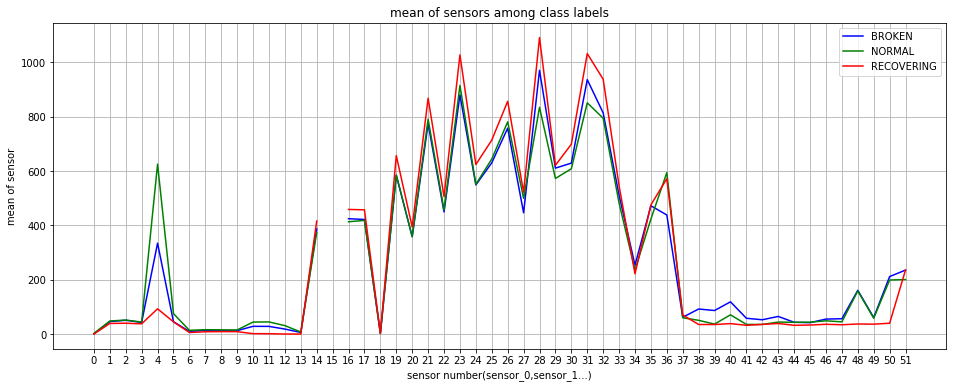

In [6]:
g=data.groupby('machine_status') #created groups by class label
x=np.arange(0,52)
d_m=g.mean() # calculated mean for each group
fig=plt.figure(num=None, figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(x)
plt.plot(x[0:15],d_m.loc['BROKEN'].values[0:15],label='BROKEN',C='b') #plot mean for 0 to 15 sensor, we show absent of sensor_15 we plot data in parts.
plt.plot(x[16:],d_m.loc['BROKEN'].values[15:],C='b')
plt.plot(x[0:15],d_m.loc['NORMAL'].values[0:15],label='NORMAL',C='g')
plt.plot(x[16:],d_m.loc['NORMAL'].values[15:],C='g')
plt.plot(x[0:15],d_m.loc['RECOVERING'].values[0:15],label='RECOVERING',C='r')
plt.plot(x[16:],d_m.loc['RECOVERING'].values[15:],C='r')
plt.legend()
plt.xlabel('sensor number(sensor_0,sensor_1...)')
plt.ylabel('mean of sensor')
plt.title('mean of sensors among class labels')
plt.grid()
plt.show()

- Above, we plot a graph for each sensor vs means of that sensor values for each class label.
- We removed the column 'sensor_15' because it was empty column hence we can see the discontinuity in the graph.
- We can see there are some sensors for which the difference in the mean is high, eg. sensor_4, sensor_28, sensor_31, etc.
- there are sensors like sensor_1,sensor_6, etc for which we can't differentiate mean.
- one more thing we can observe that 'RECOVERING' state is different from both 'NORMAL' and 'BROKEN'.
- From the above plot, we can't conclude the features for which we have the highest and lowest difference in mean, hence we calculate it below.

difference in mean for each sensor in desending order:

 {'sensor_04': 291.00108436330385, 'sensor_36': 156.04889447763298, 'sensor_28': 136.41743903157214, 'sensor_31': 85.50417420506051, 'sensor_27': 53.54446881183833, 'sensor_39': 50.04487901487917, 'sensor_35': 48.738420711518984, 'sensor_40': 47.85339895834248, 'sensor_38': 41.635076942732965, 'sensor_29': 38.01486114459681, 'sensor_23': 34.97075802921745, 'sensor_51': 34.90797555049585, 'sensor_05': 30.037811225473938, 'sensor_33': 28.79157126481374, 'sensor_26': 23.247625728989874, 'sensor_41': 22.60256615021006, 'sensor_30': 20.777813764211942, 'sensor_43': 20.72876366177851, 'sensor_32': 19.345999677222494, 'sensor_34': 17.98584008936848, 'sensor_42': 17.28248288305251, 'sensor_11': 16.419298248816304, 'sensor_21': 16.3890383933184, 'sensor_10': 15.751031401968735, 'sensor_25': 14.000745253007608, 'sensor_14': 12.91915232764569, 'sensor_50': 12.735488758140377, 'sensor_12': 12.706585122128132, 'sensor_47': 11.417846393138952, 

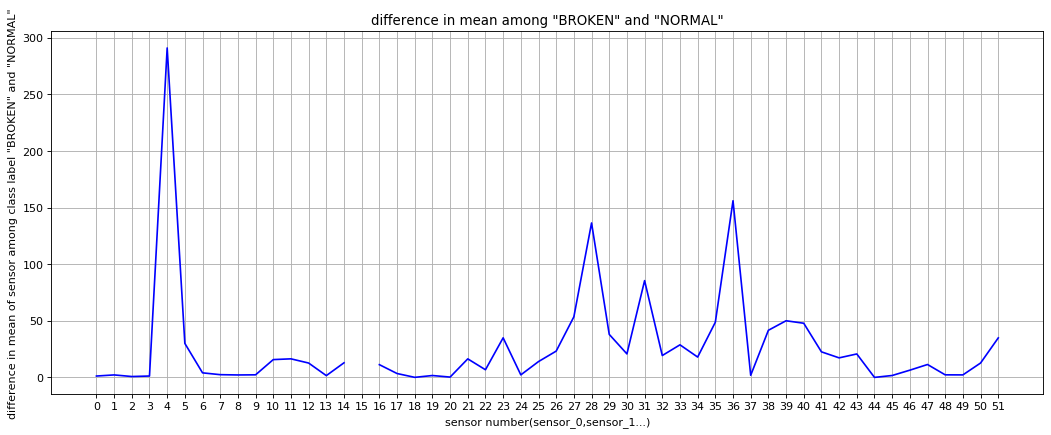

In [7]:
diff=dict()
for col in d_m.columns:
    diff[col]=abs(d_m[col][0]-d_m[col][1])

fig=plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(x)
plt.plot(x[0:15],list(diff.values())[0:15],C='b')
plt.plot(x[16:],list(diff.values())[15:],C='b')
plt.grid()
plt.xlabel('sensor number(sensor_0,sensor_1...)')
plt.ylabel('difference in mean of sensor among class label "BROKEN" and "NORMAL"')
plt.title('difference in mean among "BROKEN" and "NORMAL"')
diff={k: v for k, v in sorted(diff.items(), key=lambda item: item[1],reverse=True)}
print('difference in mean for each sensor in desending order:\n\n',diff)

- From the above plot, we can say for the features we have a high difference that features is more important but we don't know about ranges of features hence this conclusion might not fully correct.

### Checking for difference in standard deviation of class label

Text(0.5, 1.0, 'standard deviation of sensors among class labels')

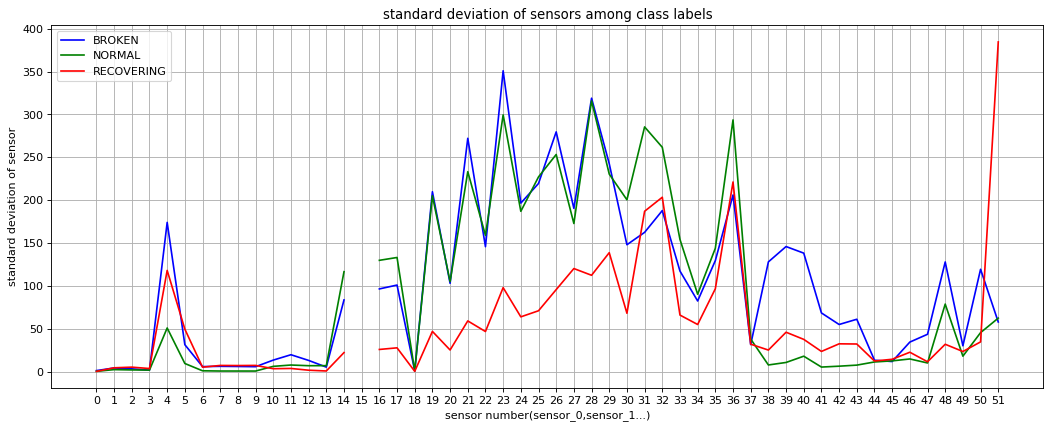

In [8]:
g=data.groupby('machine_status')
x=np.arange(0,52)
d_s=g.std()
fig=plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(x)
plt.plot(x[0:15],d_s.loc['BROKEN'].values[0:15],label='BROKEN',C='b')
plt.plot(x[16:],d_s.loc['BROKEN'].values[15:],C='b')
plt.plot(x[0:15],d_s.loc['NORMAL'].values[0:15],label='NORMAL',C='g')
plt.plot(x[16:],d_s.loc['NORMAL'].values[15:],C='g')
plt.plot(x[0:15],d_s.loc['RECOVERING'].values[0:15],label='RECOVERING',C='r')
plt.plot(x[16:],d_s.loc['RECOVERING'].values[15:],C='r')
plt.grid()
plt.legend()
plt.xlabel('sensor number(sensor_0,sensor_1...)')
plt.ylabel('standard deviation of sensor')
plt.title('standard deviation of sensors among class labels')

- From the above plot, we can see the good difference in the standard deviation of features among a class label.

difference in mean for each sensor in desending order:

 {'sensor_39': 135.20827068458374, 'sensor_04': 123.14102179324644, 'sensor_31': 123.0141538285402, 'sensor_38': 120.25289974062748, 'sensor_40': 120.21381801620254, 'sensor_36': 87.595120457912, 'sensor_50': 73.87993163076197, 'sensor_32': 73.84830026053115, 'sensor_41': 63.149553070902456, 'sensor_43': 53.50709162539177, 'sensor_30': 52.454023200370386, 'sensor_23': 51.4423968903219, 'sensor_48': 49.122620688040314, 'sensor_42': 48.63328998224237, 'sensor_21': 38.928685555860454, 'sensor_33': 36.90550322912523, 'sensor_47': 33.47308991799974, 'sensor_16': 33.3595256963319, 'sensor_14': 32.95343072839721, 'sensor_17': 32.16741126143873, 'sensor_26': 26.38499289873809, 'sensor_05': 21.93383050821371, 'sensor_46': 19.693523236362807, 'sensor_27': 17.681860549820527, 'sensor_35': 14.406109858217093, 'sensor_22': 13.257125169224622, 'sensor_29': 12.146738869872905, 'sensor_49': 12.089064867648364, 'sensor_11': 12.000392105419996, 'se

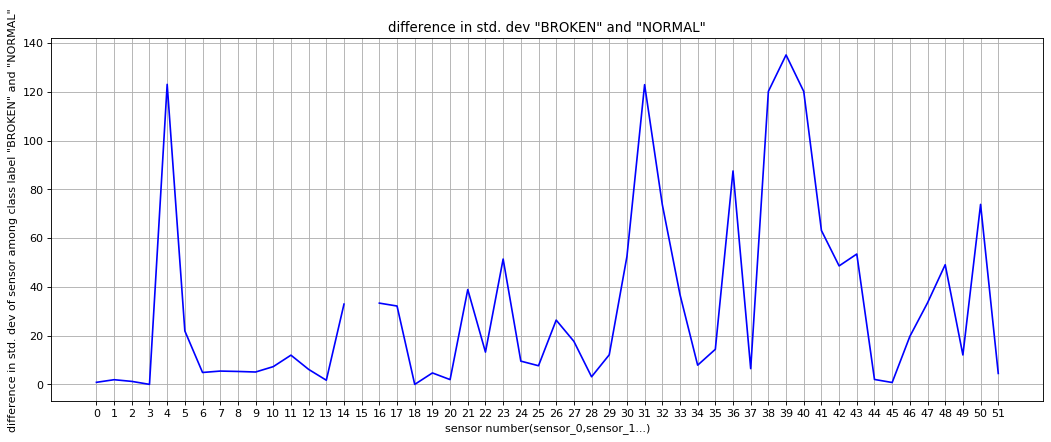

In [9]:
diff=dict()
for col in d_m.columns:
    diff[col]=abs(d_s[col][0]-d_s[col][1])

fig=plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(x)
plt.plot(x[0:15],list(diff.values())[0:15],C='b')
plt.plot(x[16:],list(diff.values())[15:],C='b')
plt.grid()
plt.xlabel('sensor number(sensor_0,sensor_1...)')
plt.ylabel('difference in std. dev of sensor among class label "BROKEN" and "NORMAL"')
plt.title('difference in std. dev "BROKEN" and "NORMAL"')
diff={k: v for k, v in sorted(diff.items(), key=lambda item: item[1],reverse=True)}
print('difference in mean for each sensor in desending order:\n\n',diff)

- We can observe that so many features have a good difference in std. dev. among class label "BROKEN" and "NORMAL", but we should keep in mind that we have only 7 samples of "BROKEN" class hence this difference may appear due to this reason.

### Plots for some important features:

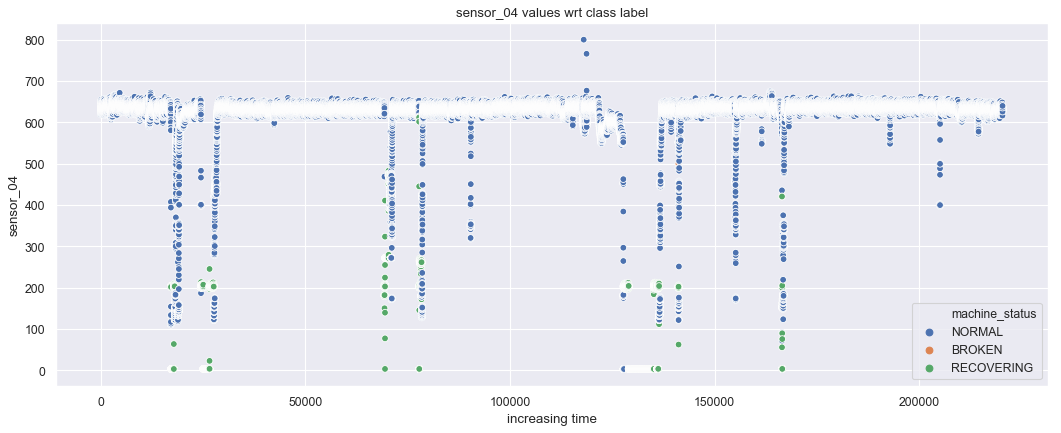

In [12]:
x=np.arange(data.shape[0])
fig=plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.scatterplot(x=x, y='sensor_04', hue= 'machine_status',data=data)
plt.xlabel('increasing time')
plt.title('sensor_04 values wrt class label')
plt.show()

- There is a lot overlap of points hence we can't visualize the point of 'BROKEN' class as they are very few.
- We can see that points of 'RECOVERING' class are well separated from 'NORMAL'.
- From this plot, we can't say that sensor_04 might separate our classes because there is a lot overlap. hence we plotted PDF below.

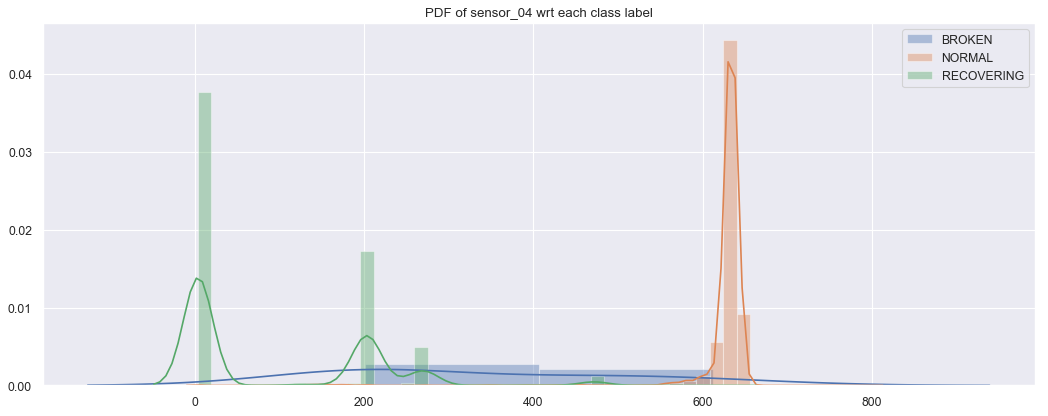

In [13]:
g=data.groupby('machine_status')
fig=plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(g.get_group('BROKEN')['sensor_04'].values,label='BROKEN')
sns.distplot(g.get_group('NORMAL')['sensor_04'].values,label='NORMAL')
sns.distplot(g.get_group('RECOVERING')['sensor_04'].values,label='RECOVERING')
plt.title('PDF of sensor_04 wrt each class label')
plt.legend()

- PDFs of class 'BROKEN' and 'NORMAL' are fully separated from each other.
- The spread of PDF of 'BROKEN' class is more then others and if we observe histograms of 'BROKEN' class, it is separated from the histogram of 'NORMAL' class, which is good.


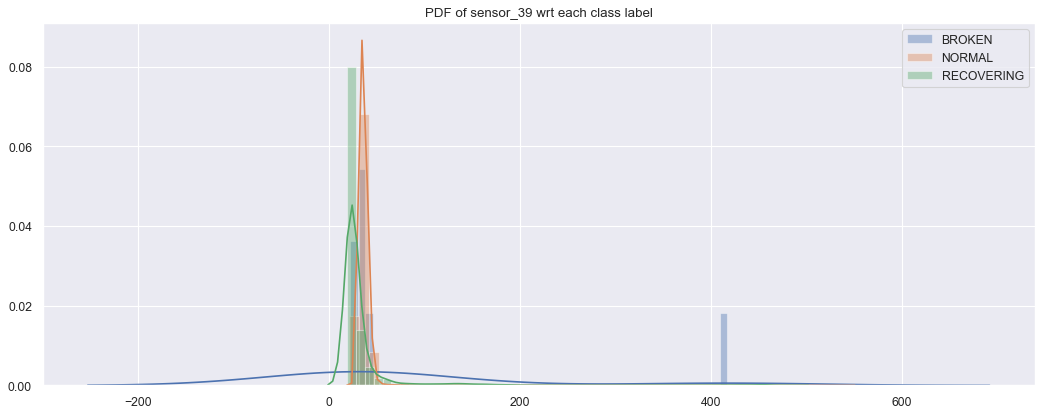

In [14]:
g=data.groupby('machine_status')
fig=plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(g.get_group('BROKEN')['sensor_39'].values,label='BROKEN')
sns.distplot(g.get_group('NORMAL')['sensor_39'].values,label='NORMAL')
sns.distplot(g.get_group('RECOVERING')['sensor_39'].values,label='RECOVERING')
plt.title('PDF of sensor_39 wrt each class label')
plt.legend()

- PDFs of all classes are got overlapped for sensor_39.
- Some values of 'BROKEN' class are separated from others but most of the values are got mixed with values of other classes. 
- PDF of 'BROKEN' class is slightly shifted toward left hence some part is separated, still we can't make any strong conclusion about sensor_39.

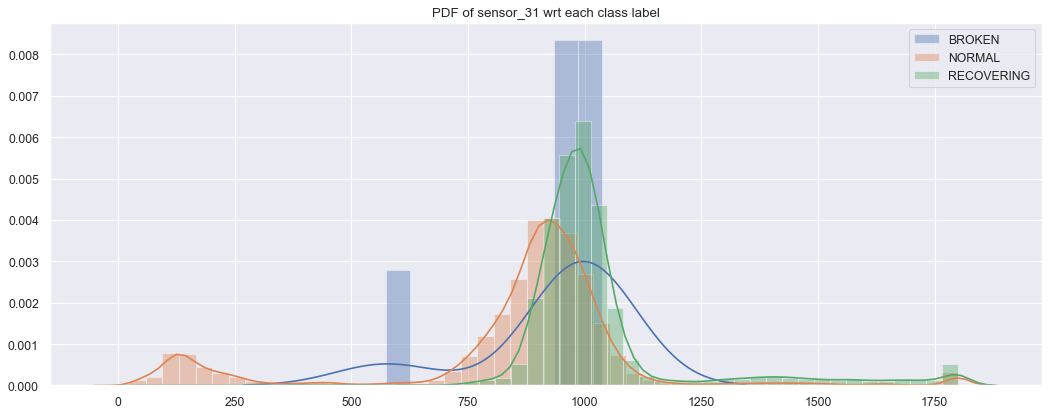

In [15]:
g=data.groupby('machine_status')
fig=plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(g.get_group('BROKEN')['sensor_31'].values,label='BROKEN')
sns.distplot(g.get_group('NORMAL')['sensor_31'].values,label='NORMAL')
sns.distplot(g.get_group('RECOVERING')['sensor_31'].values,label='RECOVERING')
plt.title('PDF of sensor_31 wrt each class label')
plt.legend()

- Values belonging 'NORMAL' class having a large range as we can see the spread is large.
- Overlap between 'NORMAL' and 'RECOVERING' class is high.
- There is also an overlap between 'NORMAL' and 'BROKEN' class but the peak of PDF of 'BROKEN' class is above than 'NORMAL' and spread is also small. hence sensor_31 might helpful to classify these classes.

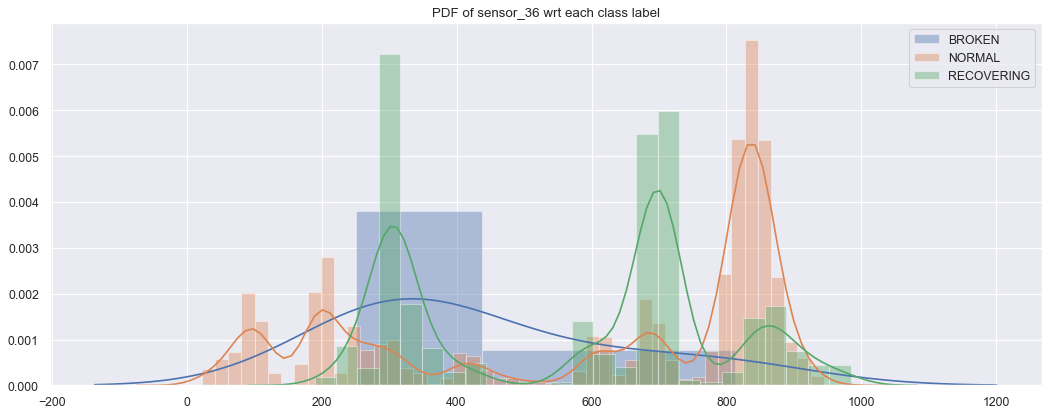

In [16]:
g=data.groupby('machine_status')
fig=plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(g.get_group('BROKEN')['sensor_36'].values,label='BROKEN')
sns.distplot(g.get_group('NORMAL')['sensor_36'].values,label='NORMAL')
sns.distplot(g.get_group('RECOVERING')['sensor_36'].values,label='RECOVERING')
plt.title('PDF of sensor_36 wrt each class label')
plt.legend()

- We can see values belonging to each class having almost the same range.
- PDFs of class 'NORMAL' and 'RECOVERING' have many small and big peaks and values are not around any single mean.
- Hence we can't conclude that sensor_36 is an important feature by just looking at the difference in the mean values of each class.

### Machine status over time
- To plot machine status over time we will convert it into numbers.
- "BROKEN" = 1, "NORMAL" = 0, "RECOVERING" = -1

In [6]:
print('we have data from date:',data['timestamp'].min(),'to',data['timestamp'].max())

we have data from date: 2018-04-01 00:00:00 to 2018-08-31 23:59:00


In [7]:
df_temp=data[['timestamp','machine_status']]
df_temp['machine_status'][df_temp['machine_status']=='BROKEN']= 1
df_temp['machine_status'][df_temp['machine_status']=='NORMAL']= 0
df_temp['machine_status'][df_temp['machine_status']=='RECOVERING']= -1

D:\study\anna\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Text(0.5, 1.0, 'machine status plot')

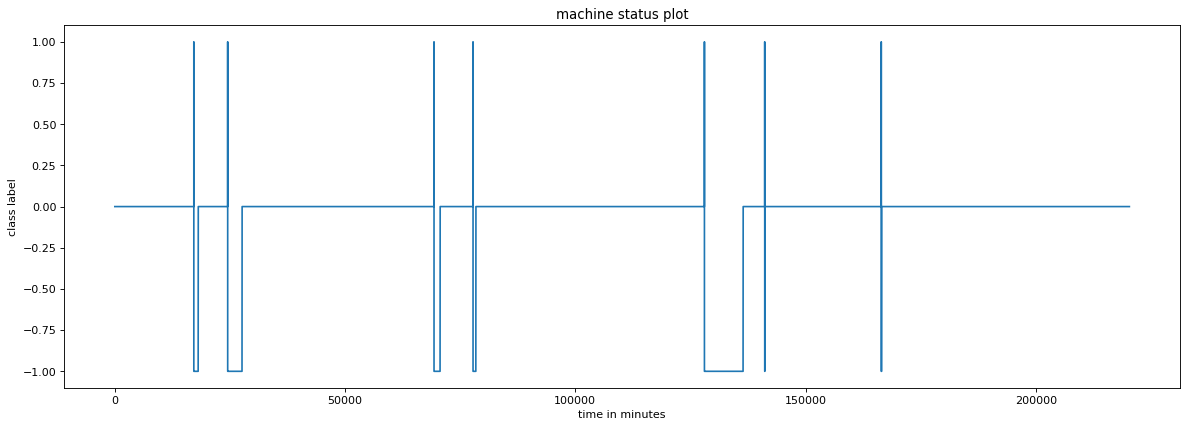

In [8]:
fig=plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_temp['machine_status'])
plt.xlabel('time in minutes')
plt.ylabel('class label')
plt.title('machine status plot')


- After each failure of the water pump, it goes into the 'RECOVERING' state for some time, which means 'RECOVERING' state is the time taken to repair the water pump and to make it working again.
- The time duration between all failures is different and the recovering time after each failure is also different.

In [9]:
f=1
for i in df_temp[df_temp['machine_status']==1].index:
    j=i+1
    temp=0
    while df_temp['machine_status'][j] == -1:
        temp=temp+1
        j=j+1
    print('for failure {0} at {2}, recovering time is {1} hours'.format(f,temp/60,df_temp['timestamp'][i]))
    f=f+1

for failure 1 at 2018-04-12 21:55:00, recovering time is 15.733333333333333 hours
for failure 2 at 2018-04-18 00:30:00, recovering time is 51.833333333333336 hours
for failure 3 at 2018-05-19 03:18:00, recovering time is 21.866666666666667 hours
for failure 4 at 2018-05-25 00:30:00, recovering time is 10.083333333333334 hours
for failure 5 at 2018-06-28 22:00:00, recovering time is 139.83333333333334 hours
for failure 6 at 2018-07-08 00:11:00, recovering time is 0.6833333333333333 hours
for failure 7 at 2018-07-25 14:00:00, recovering time is 1.25 hours


- We have printed an exact time of failure and time taken by the water pump to recover.
- In the duration of 4 months, the water pump failed 7 times.
- Maximum time of recovering of water pump is 139 hours approx 6 days and minimum time is 41 minutes.
- We can say from different recovering timing of water pump in each failure, that the causes of each failure may different, hence we should not remove any feature.

## Plotting some features and class labels over time:

- Here we are going to see how the features changed with a change in 'machine_status'.
- To get that visualization we will plot feature and 'machine_status' in a single plot with respect to time.
- We have to normalize our feature because the range of 'machine_status' is -1 to 1 and we don't know about the range of feature if the range is more then plot might not visualize properly.

D:\study\anna\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
D:\study\anna\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
D:\study\anna\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
D:\s

D:\study\anna\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
D:\study\anna\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
D:\study\anna\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
D:\s

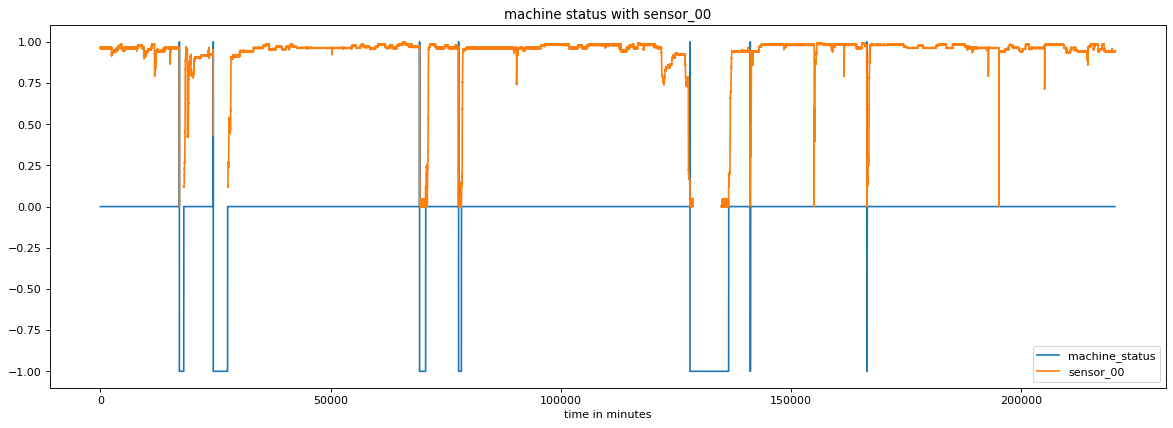

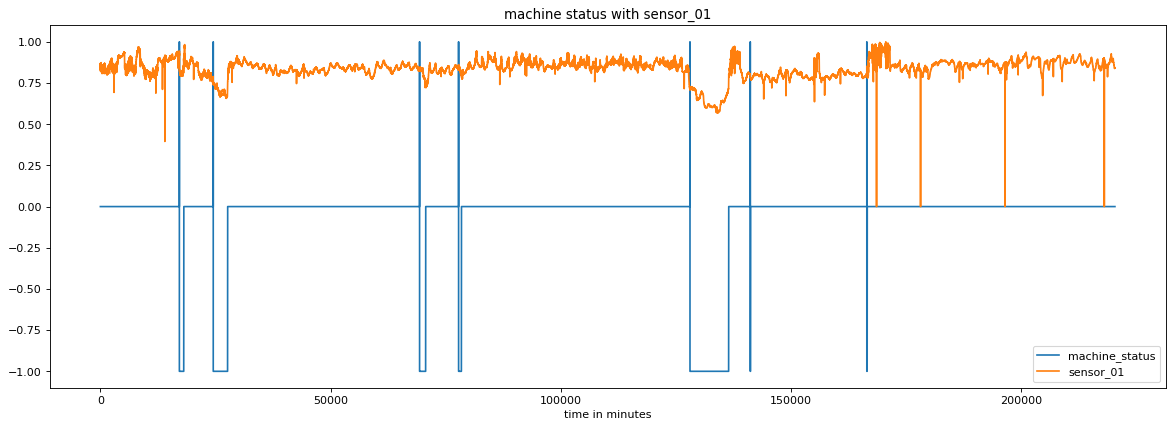

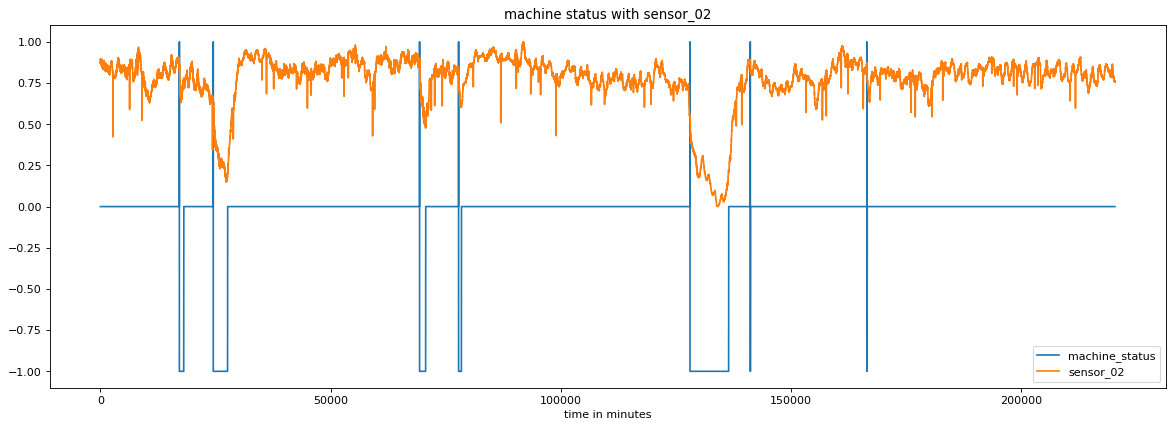

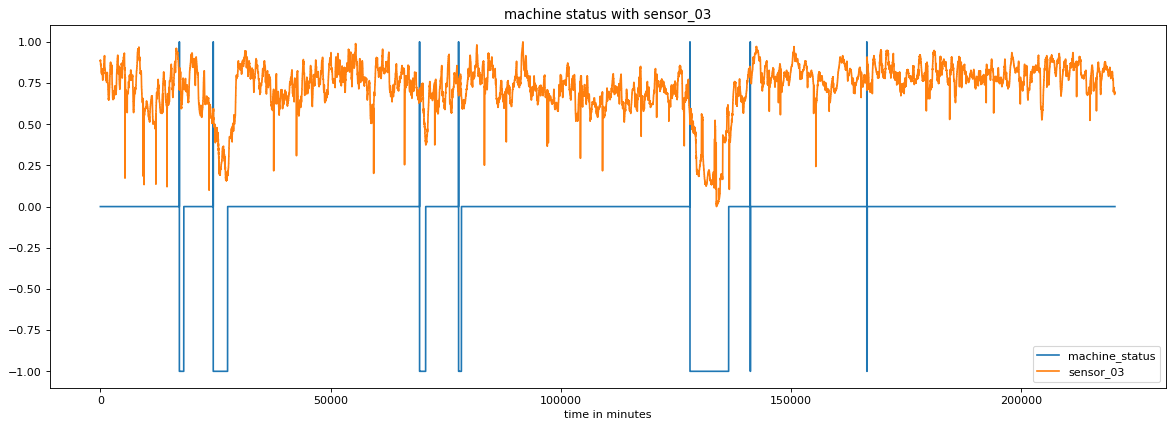

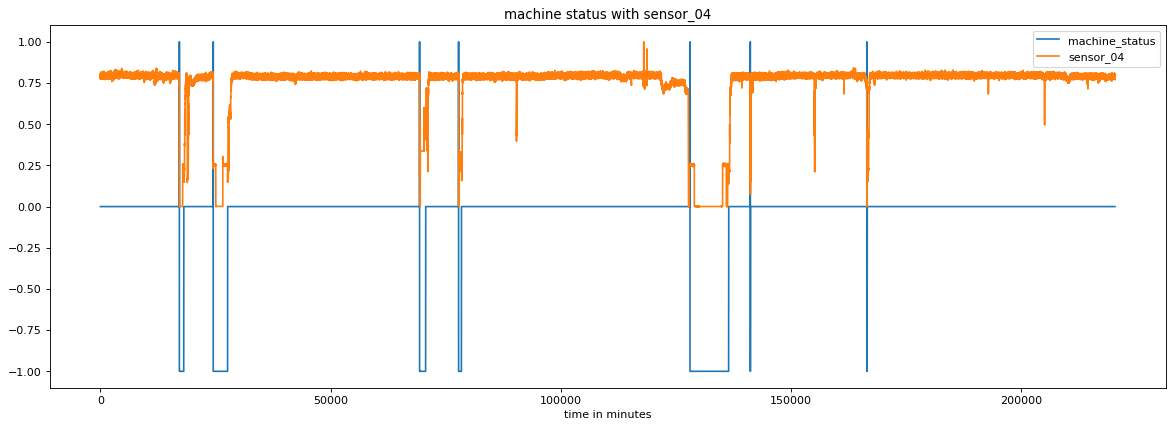

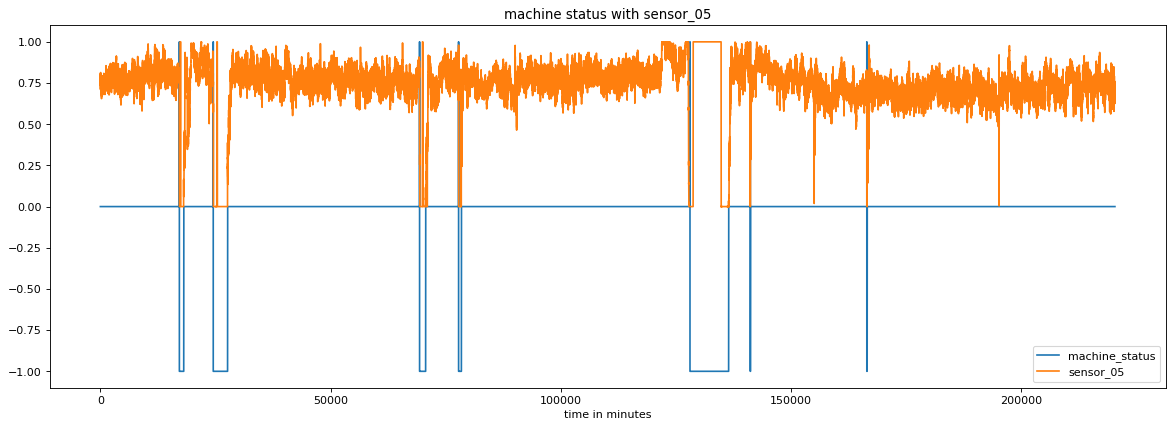

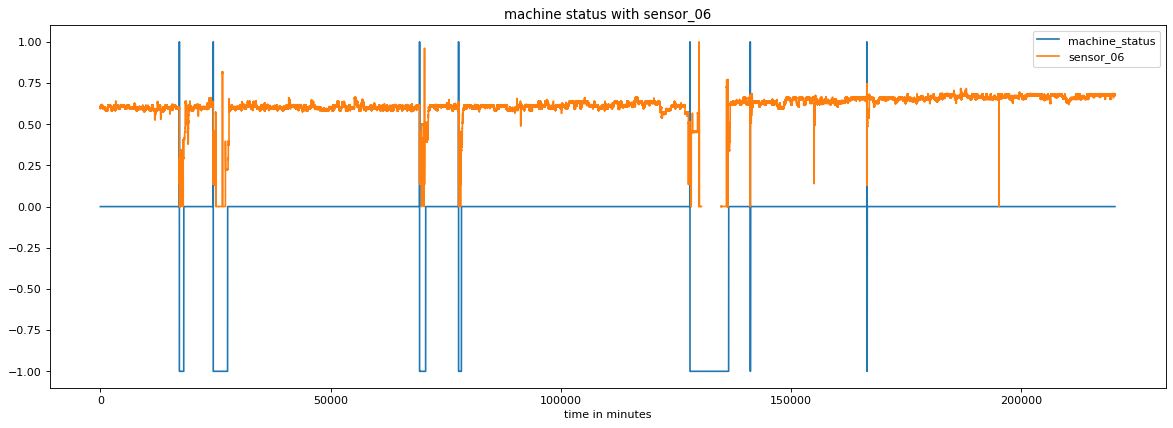

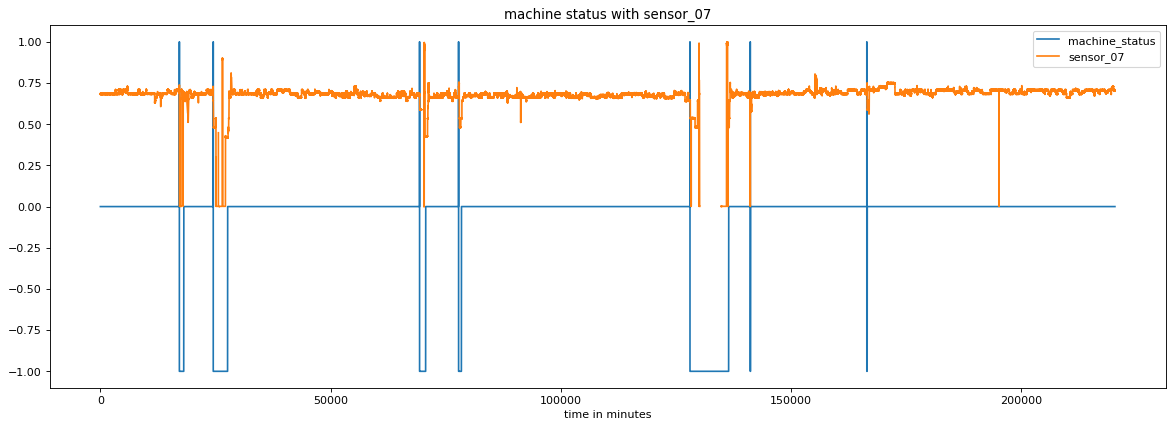

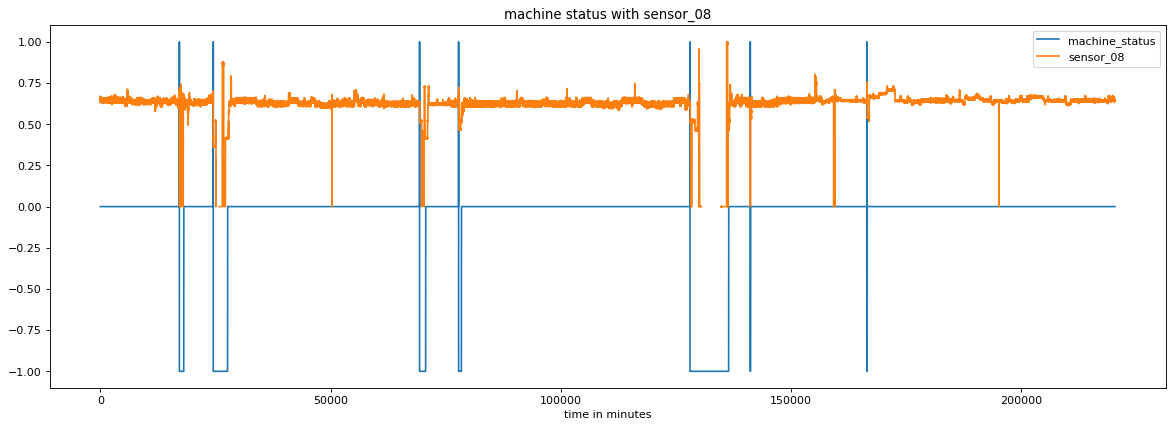

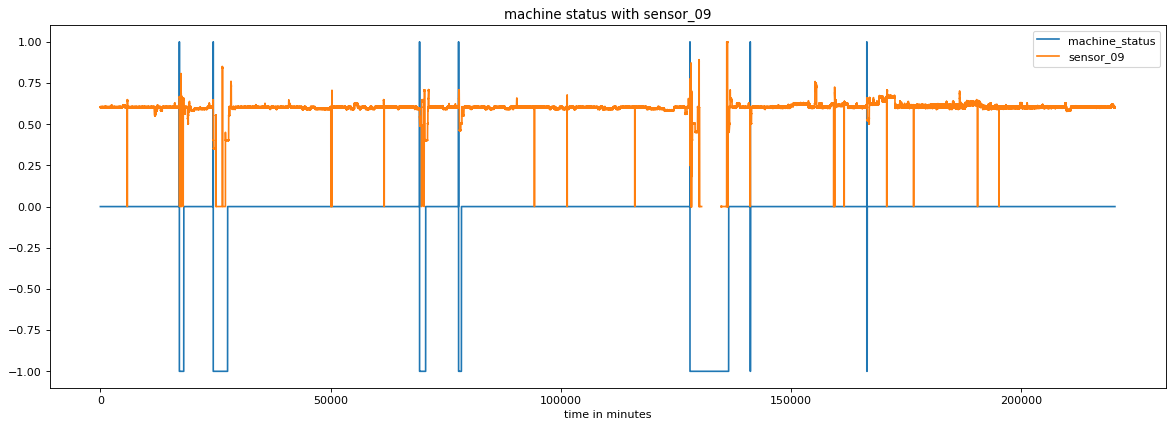

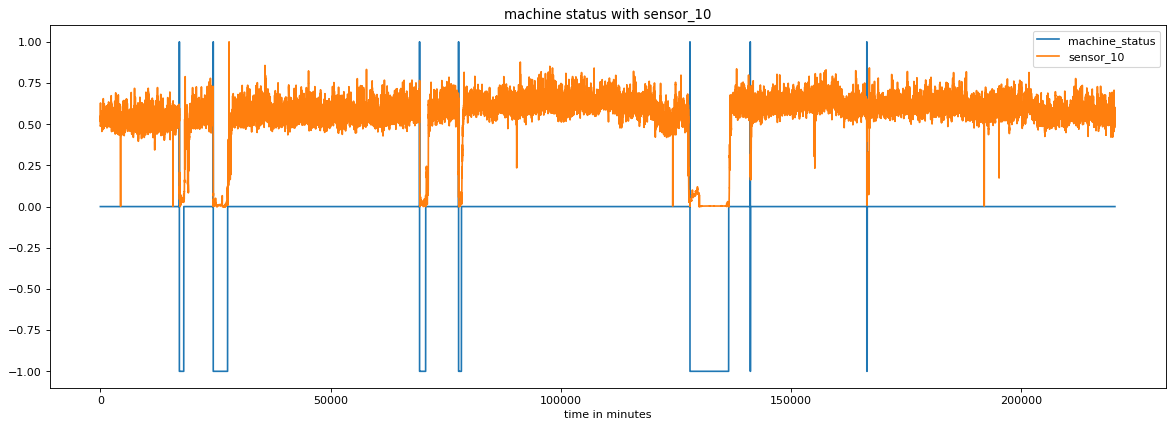

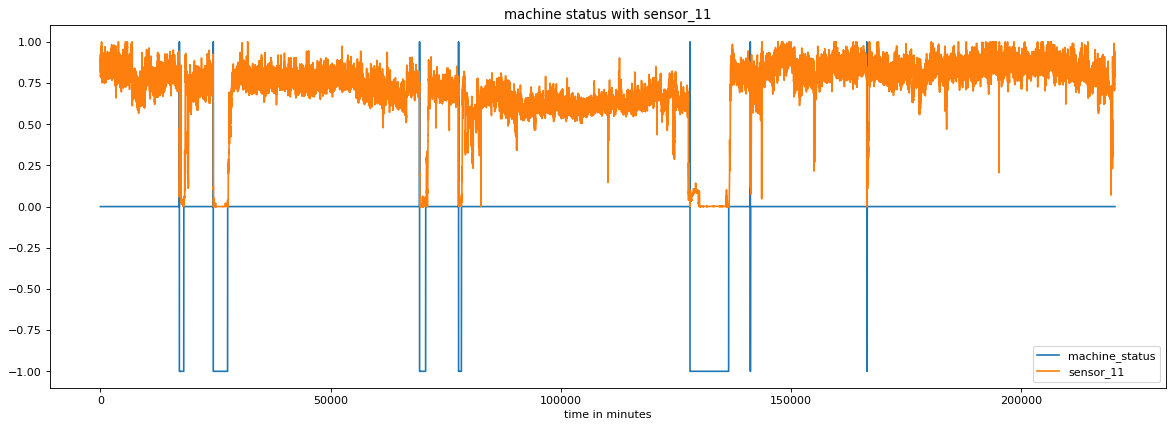

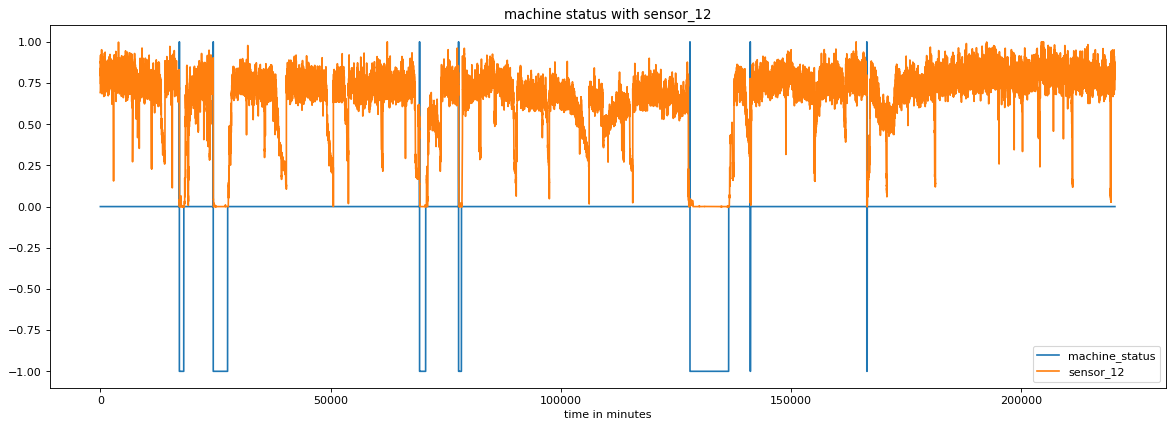

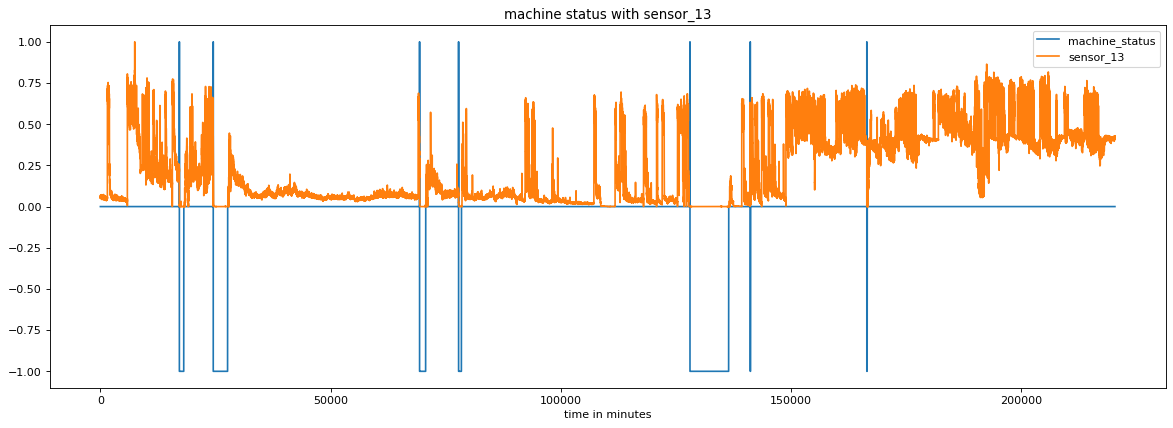

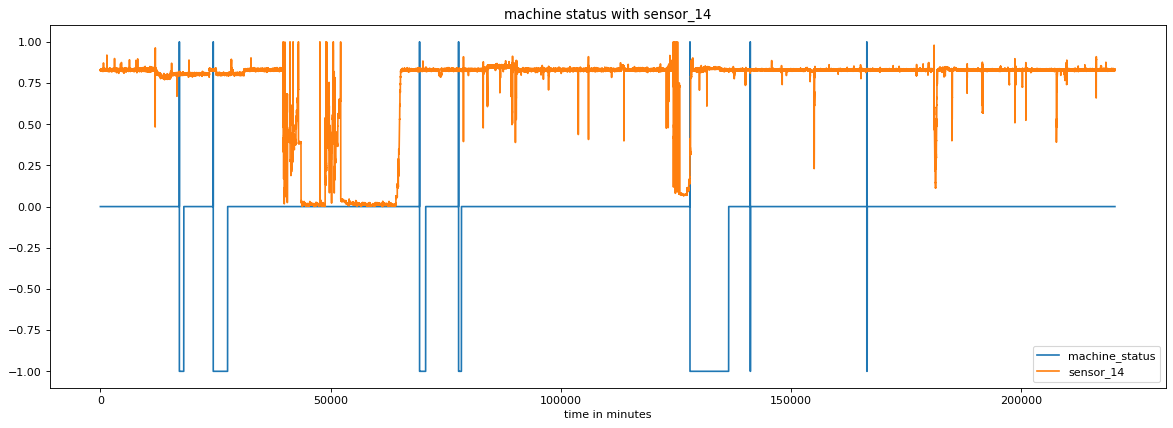

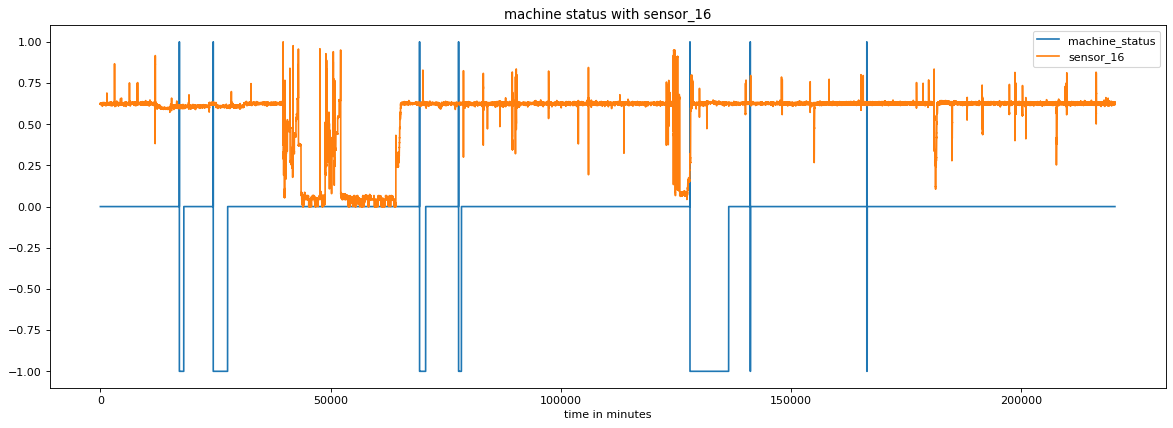

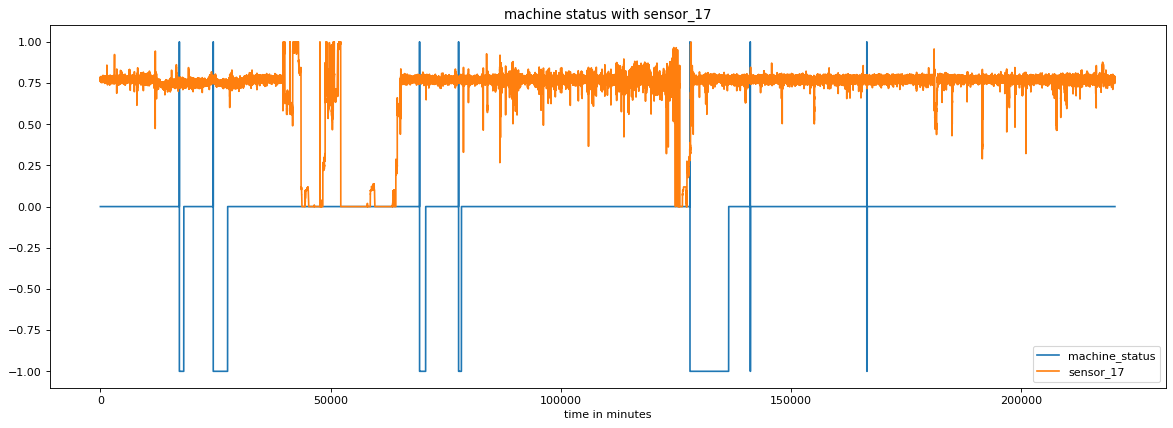

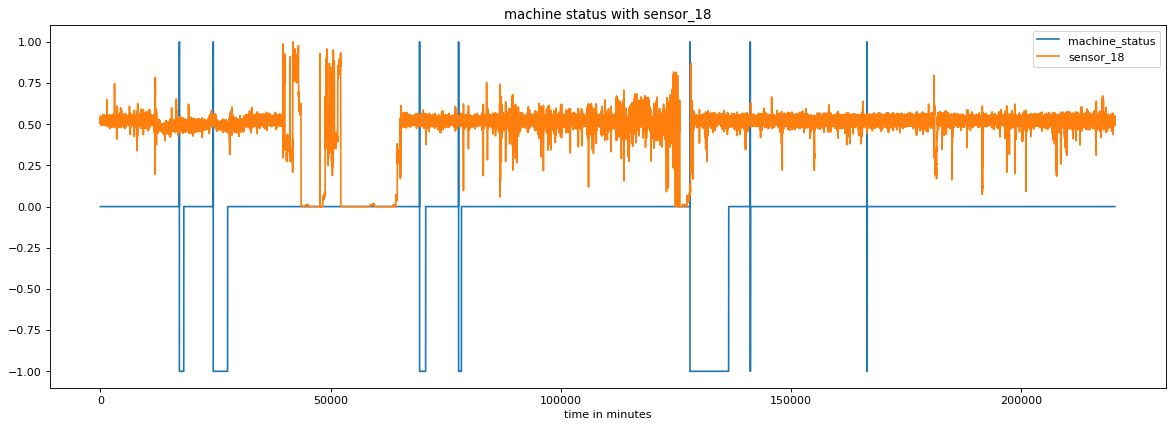

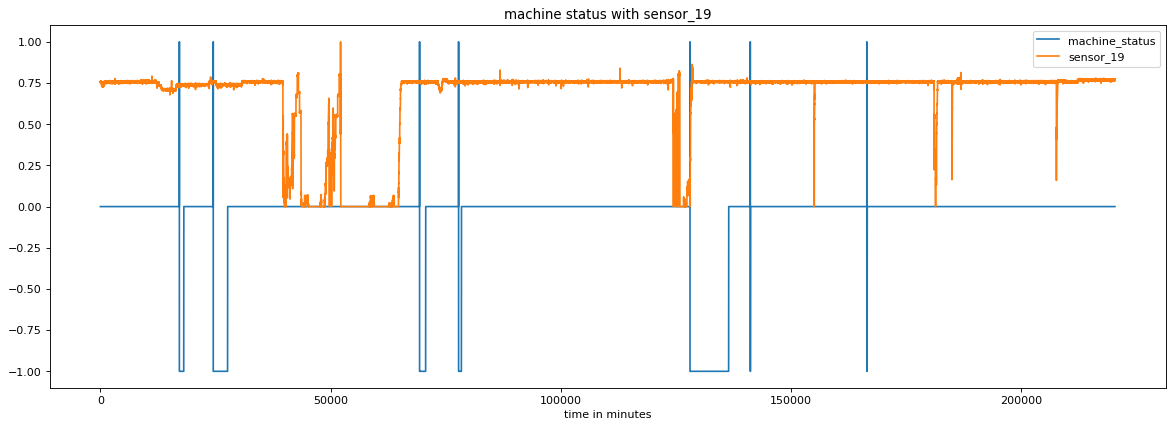

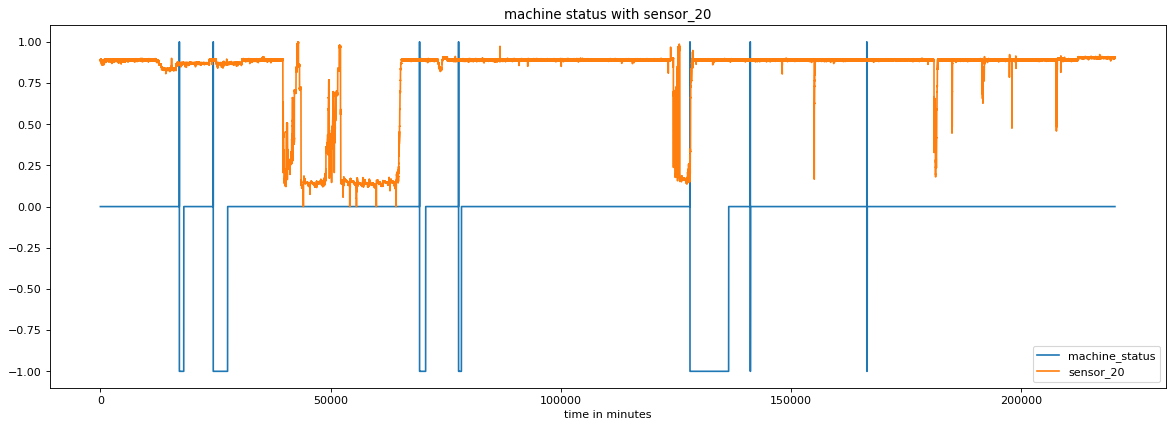

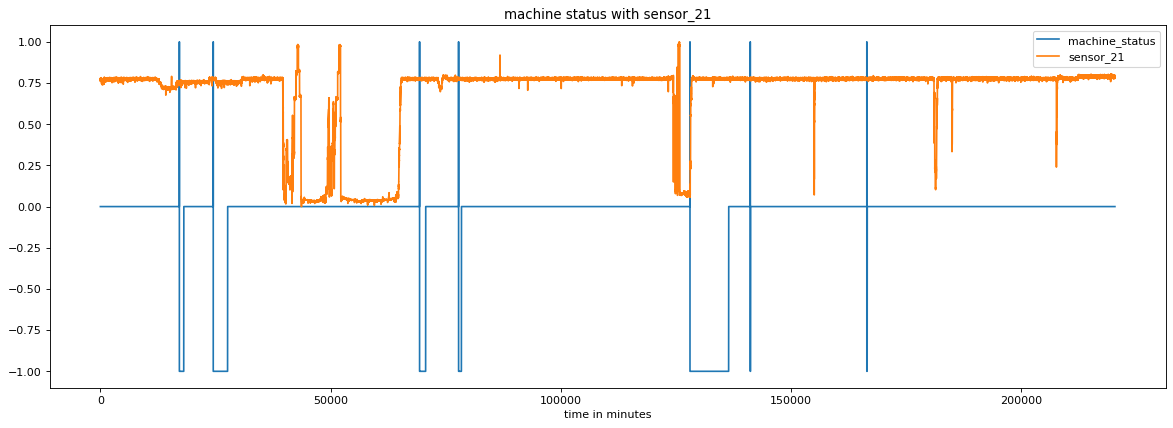

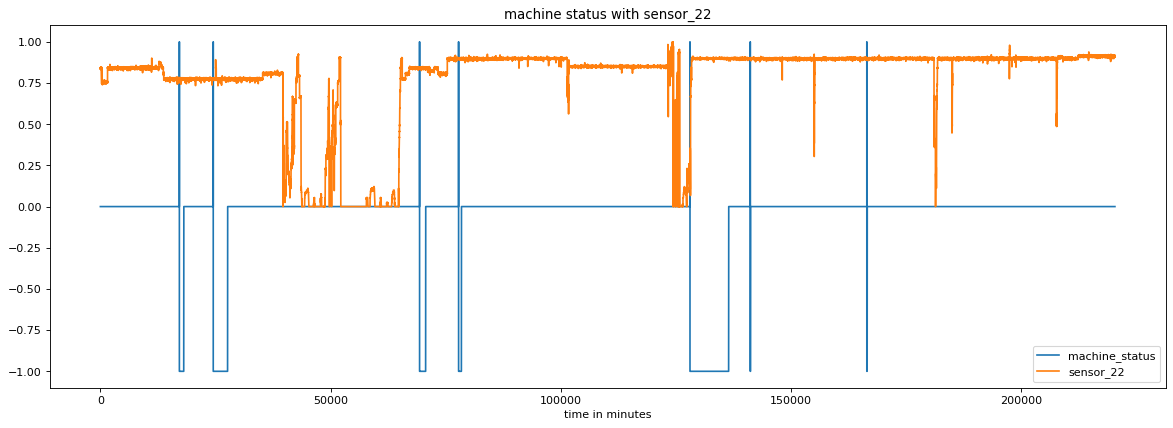

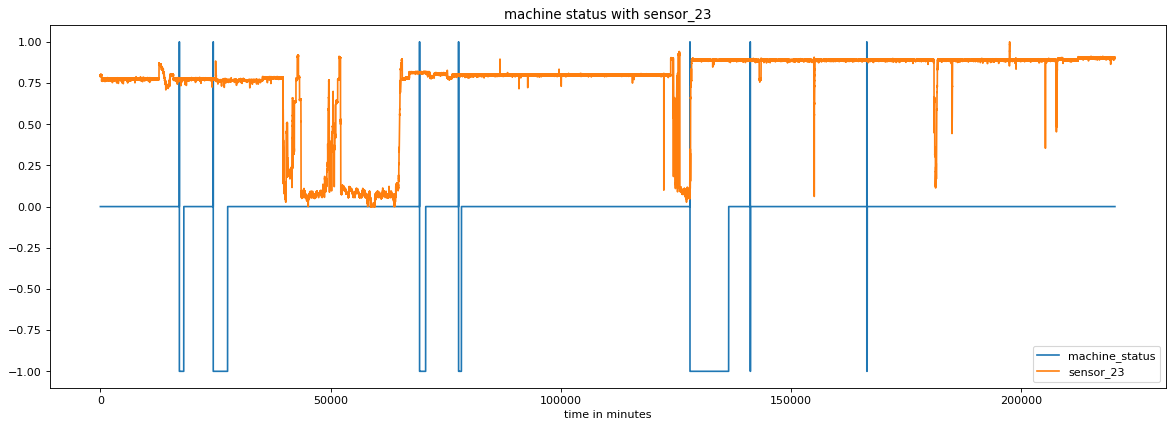

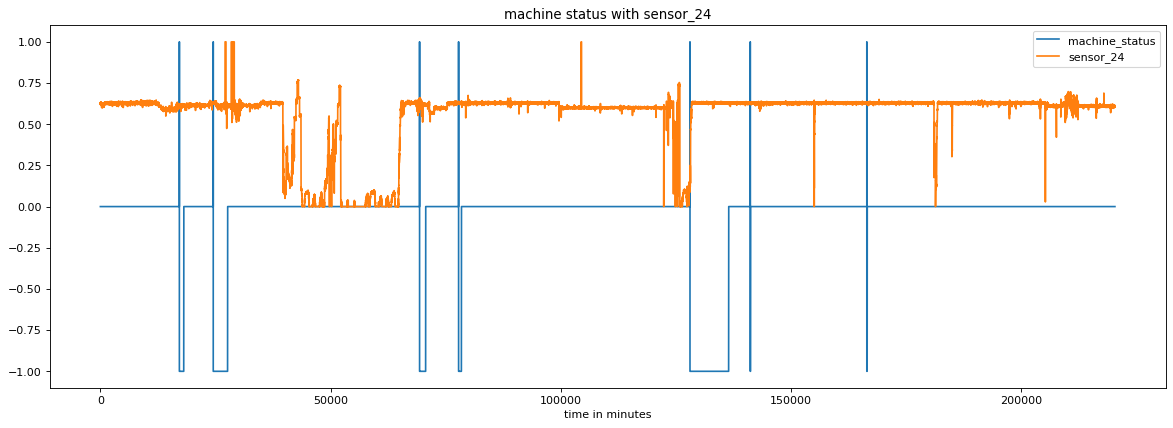

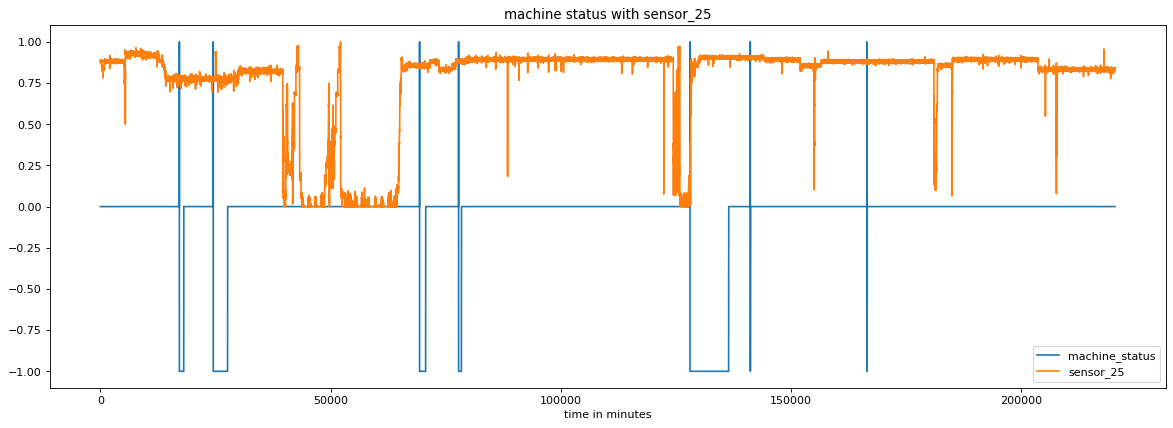

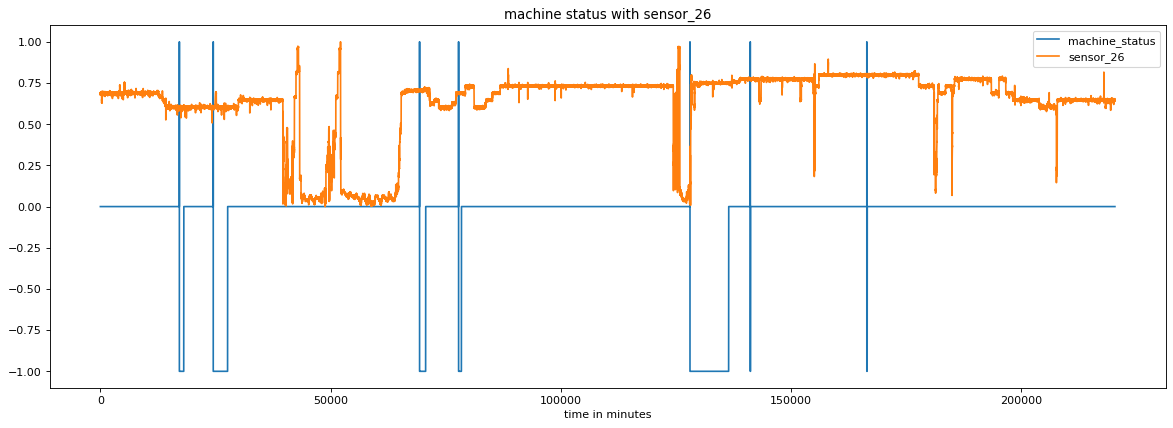

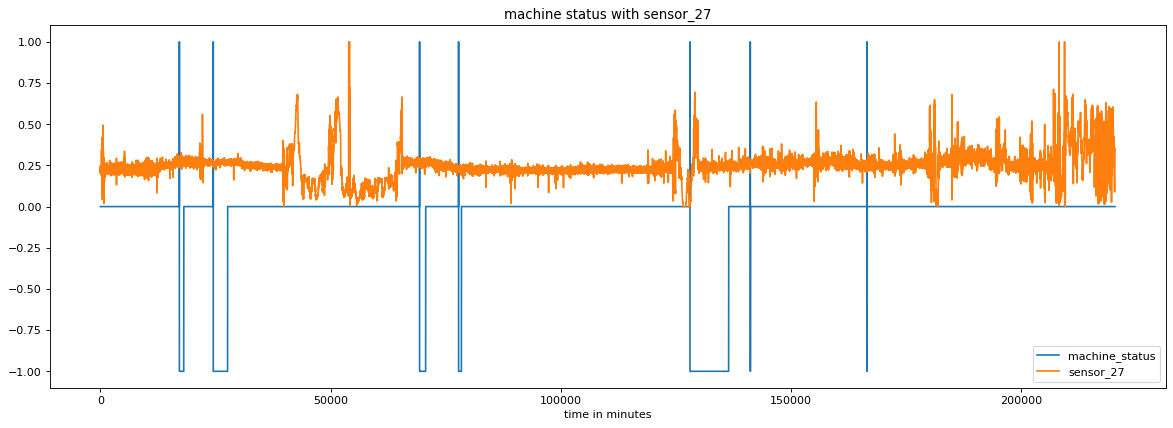

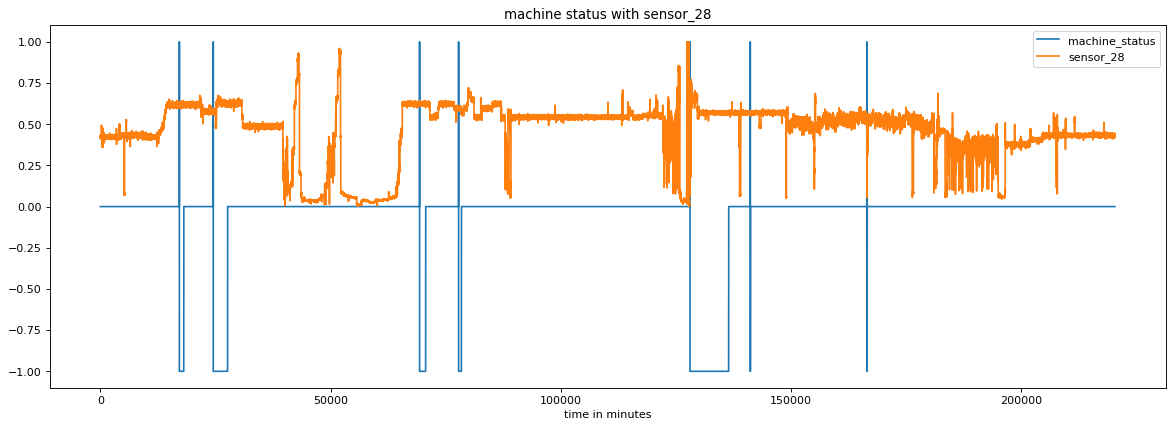

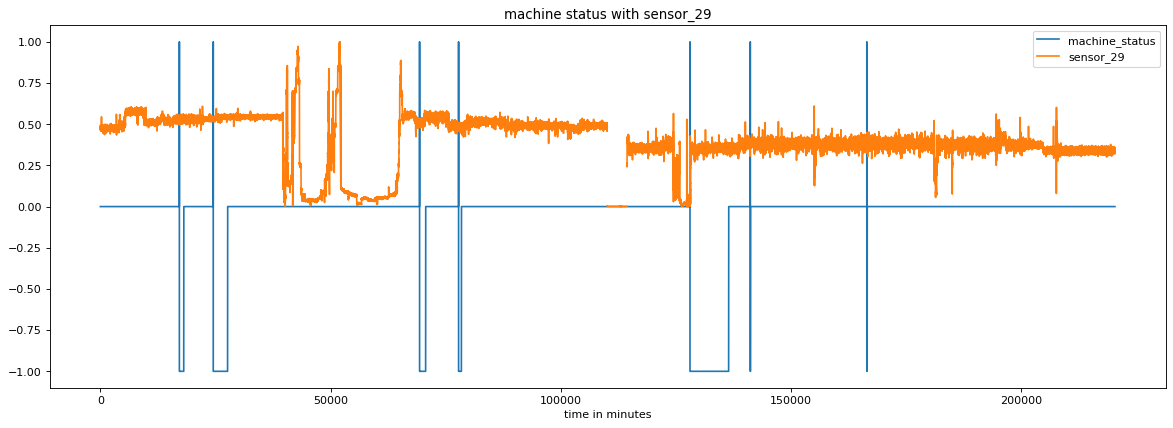

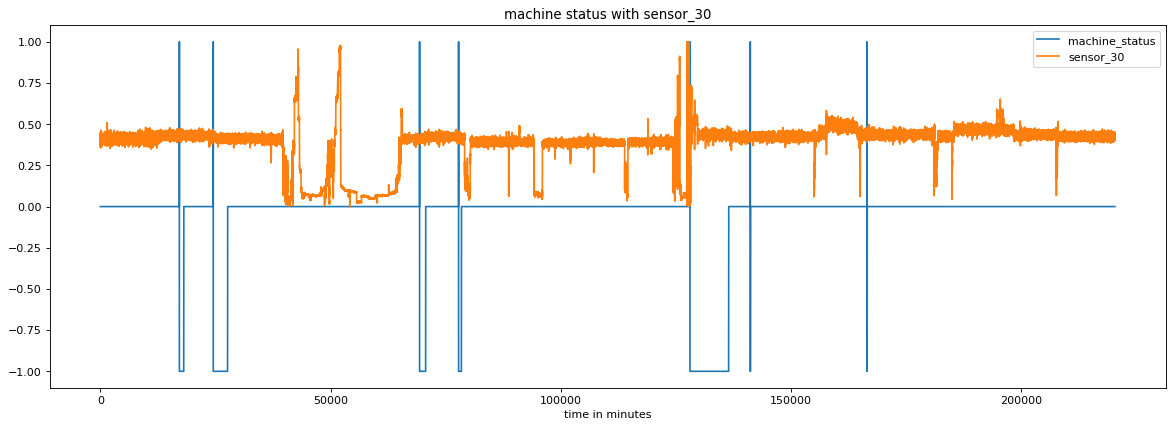

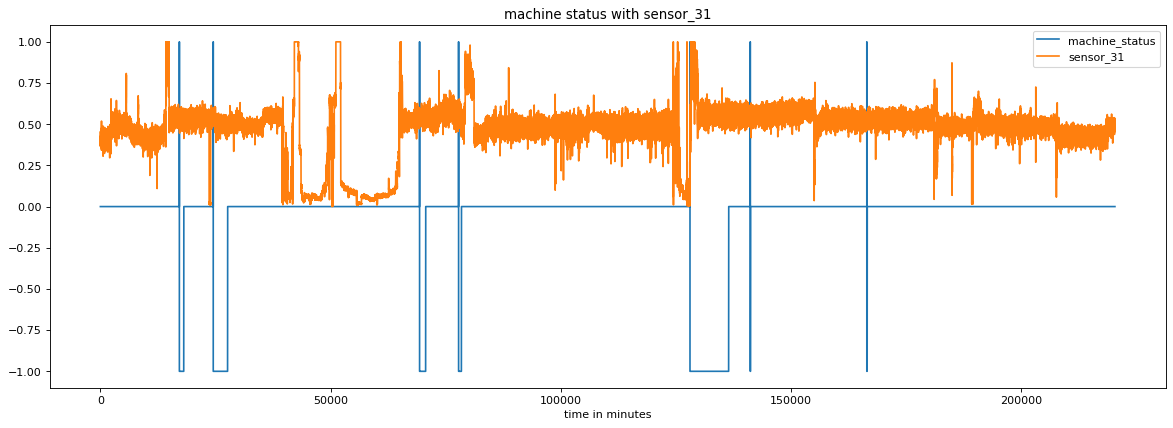

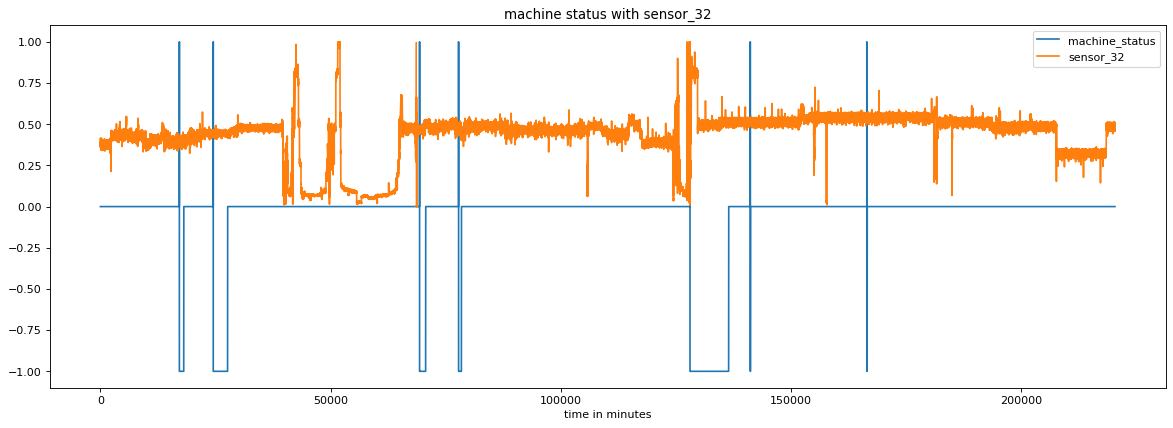

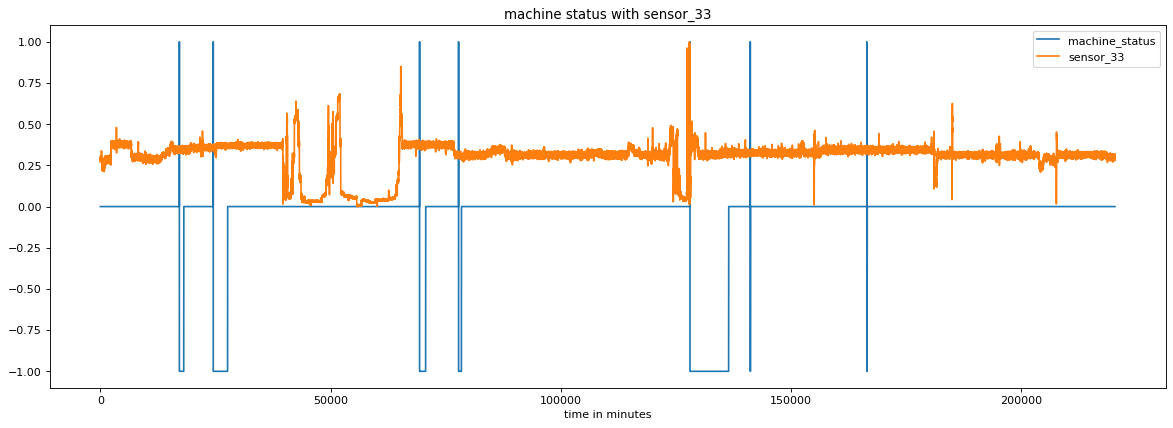

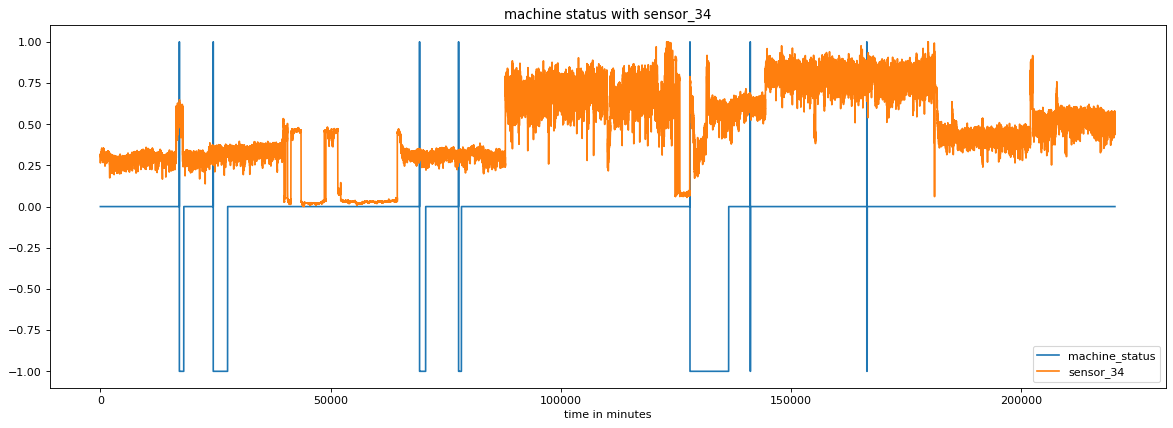

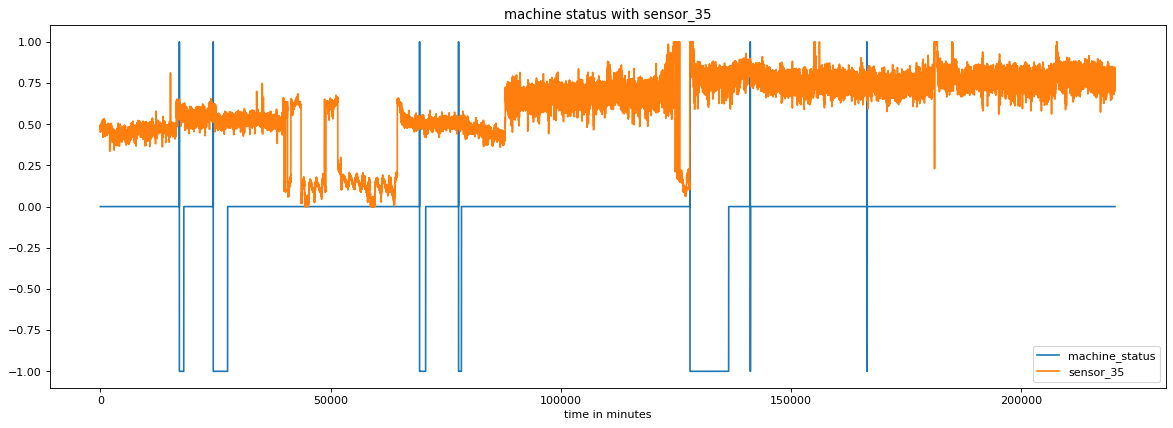

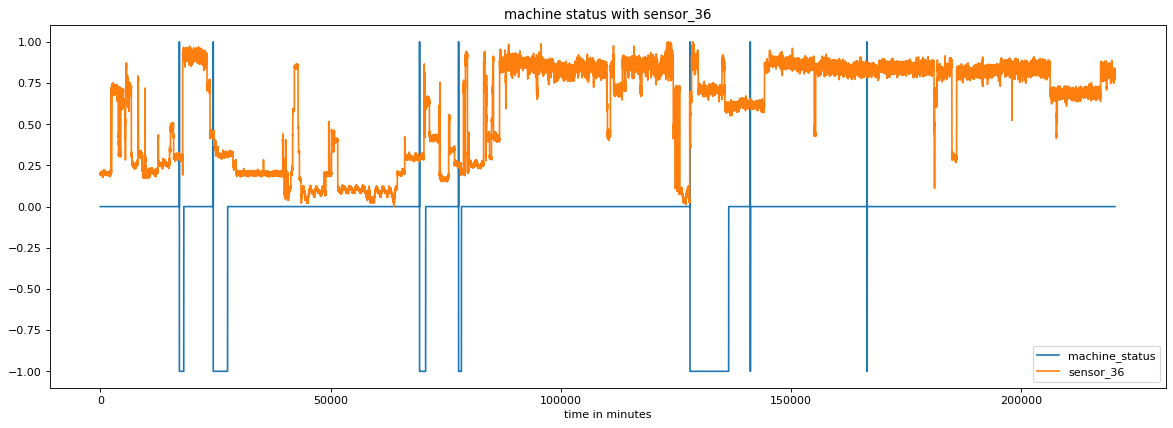

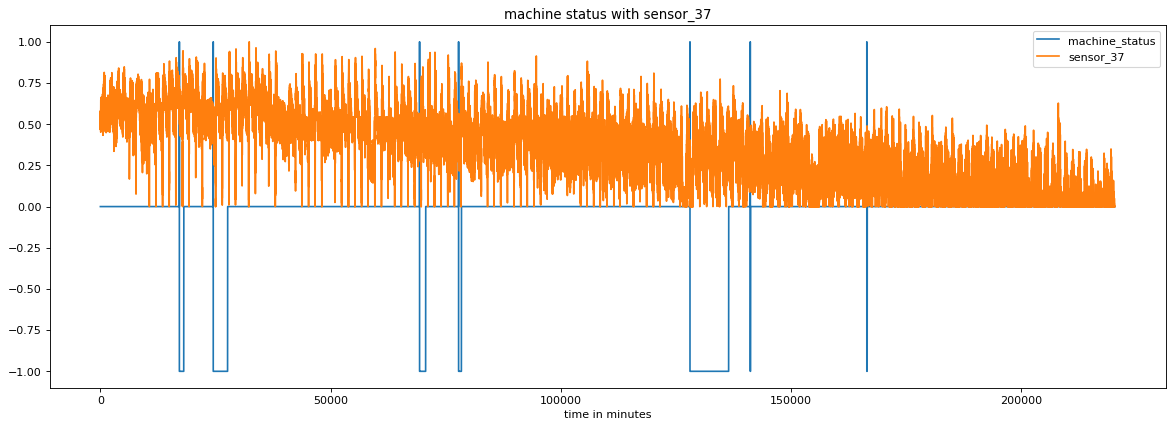

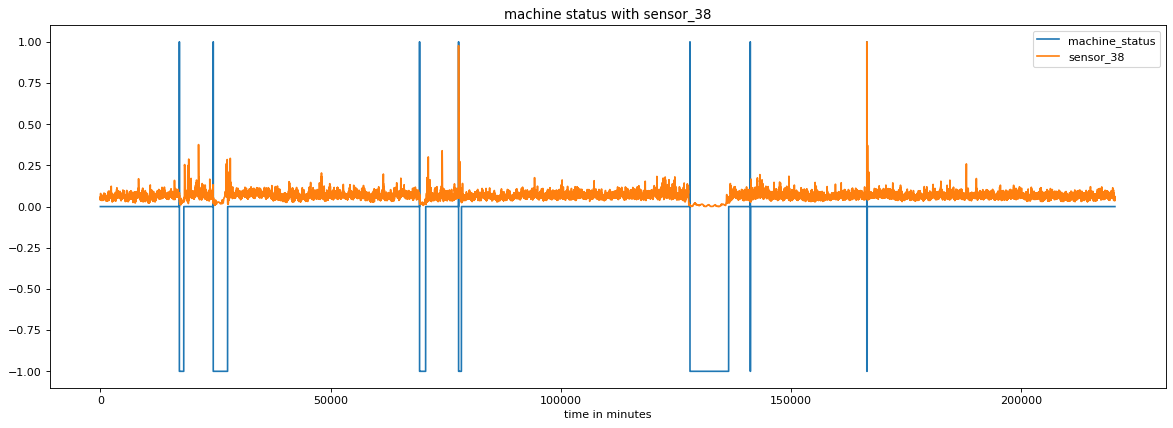

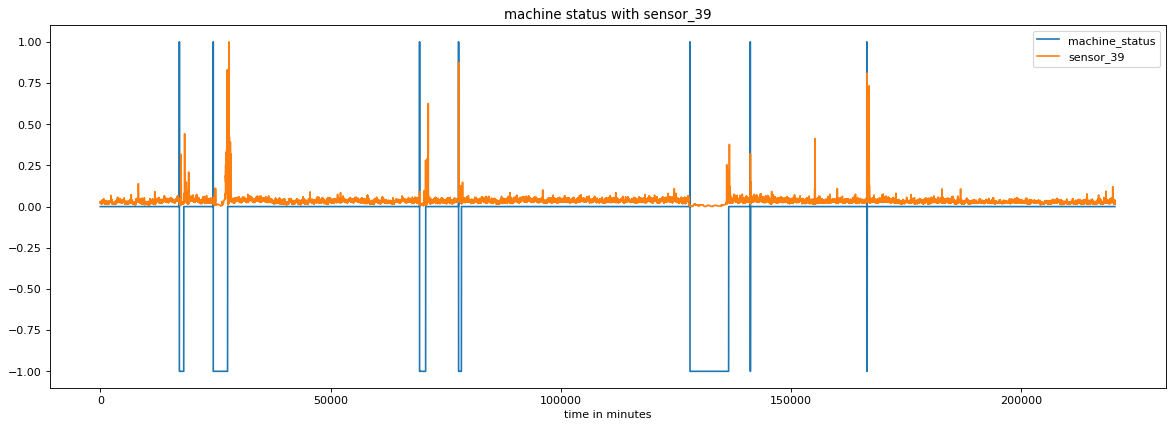

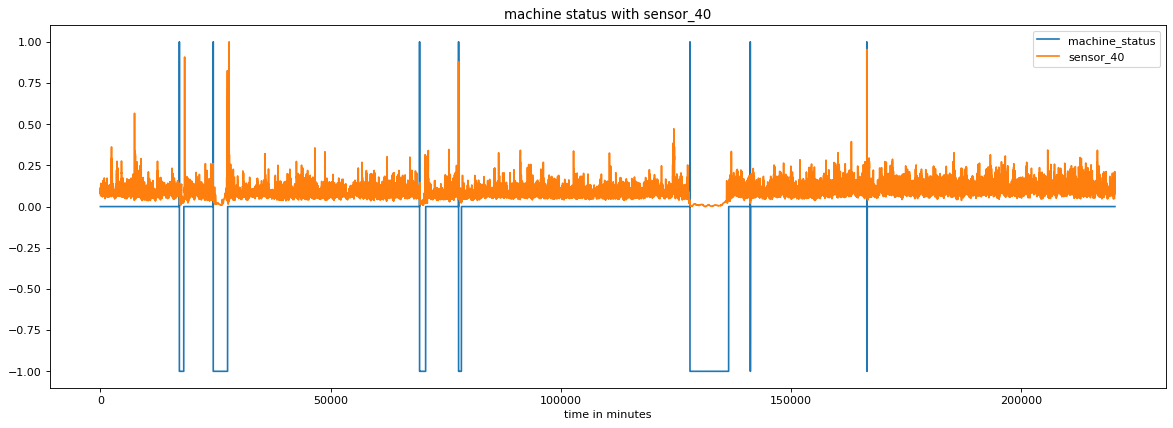

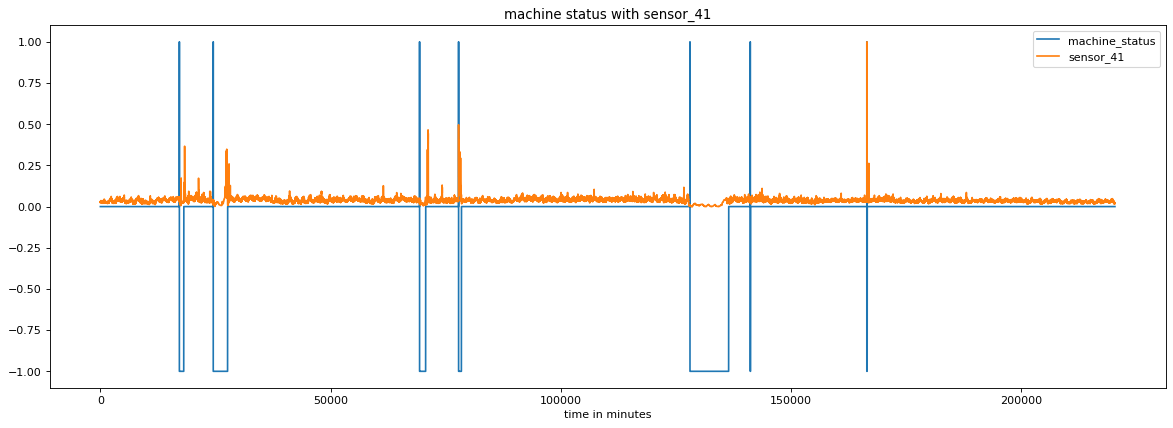

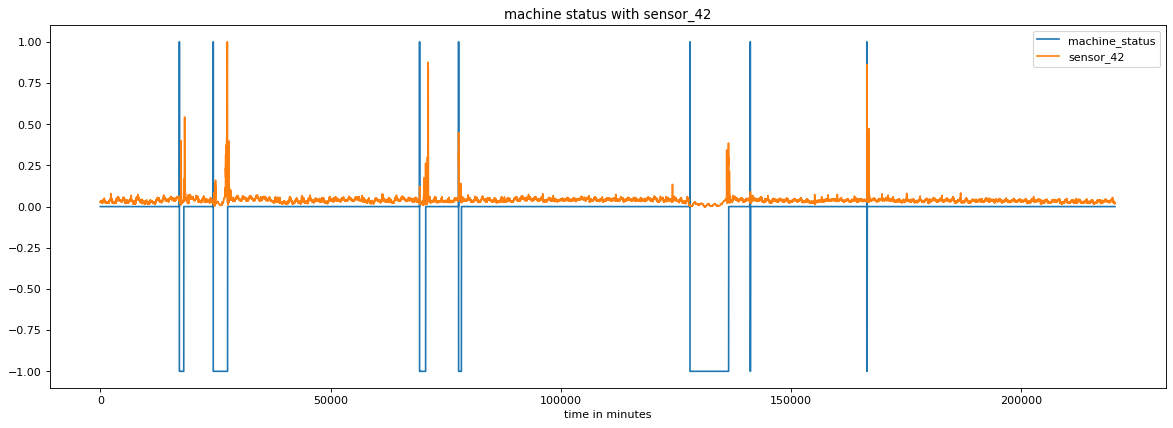

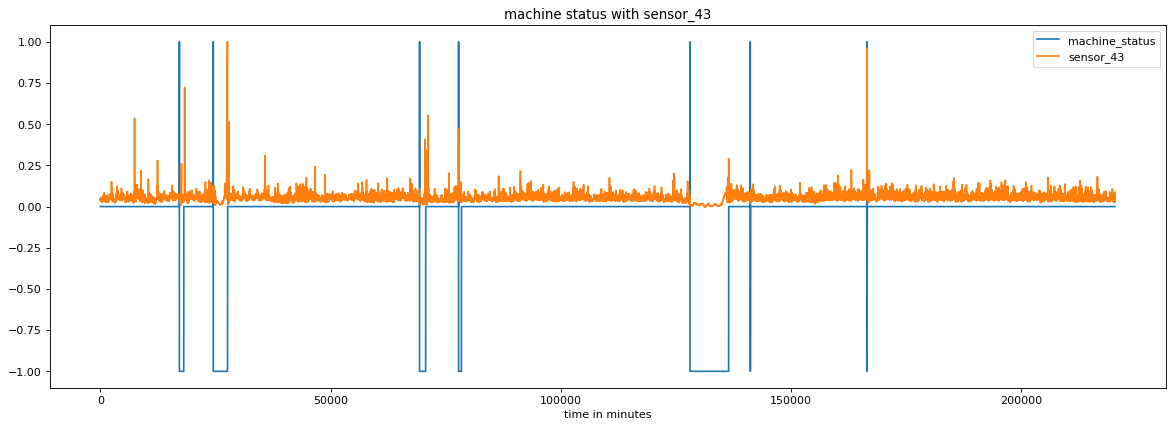

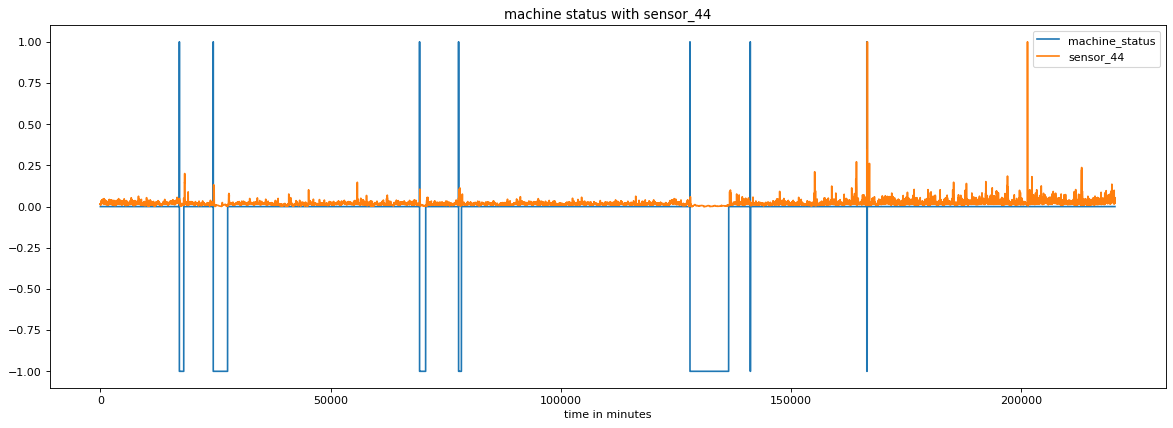

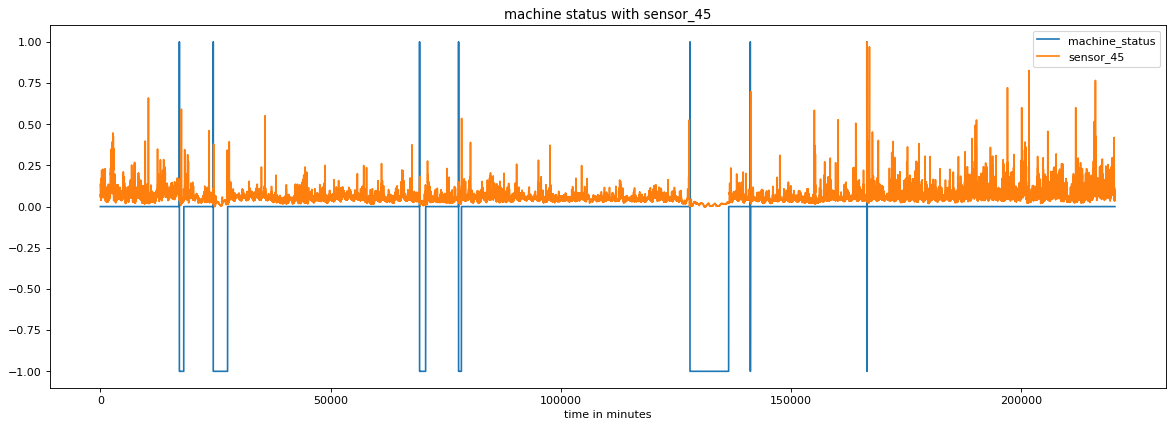

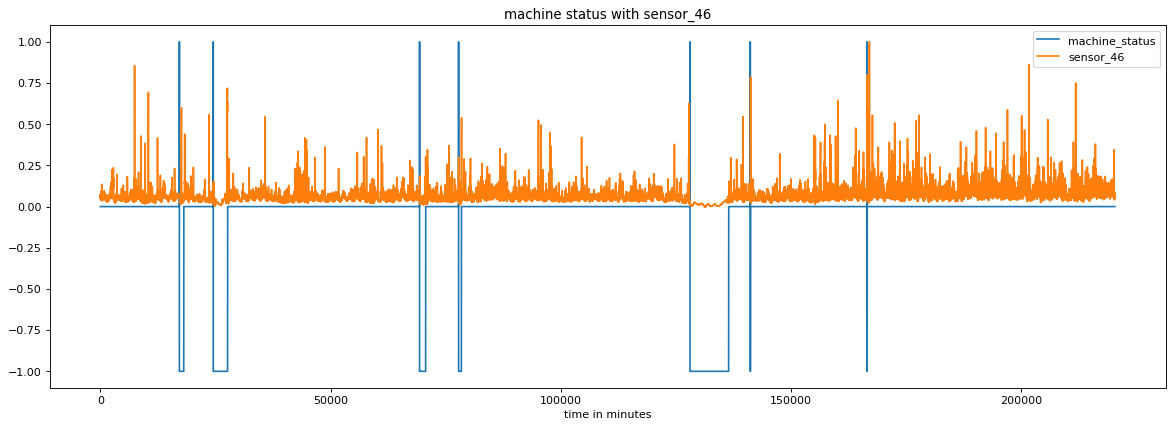

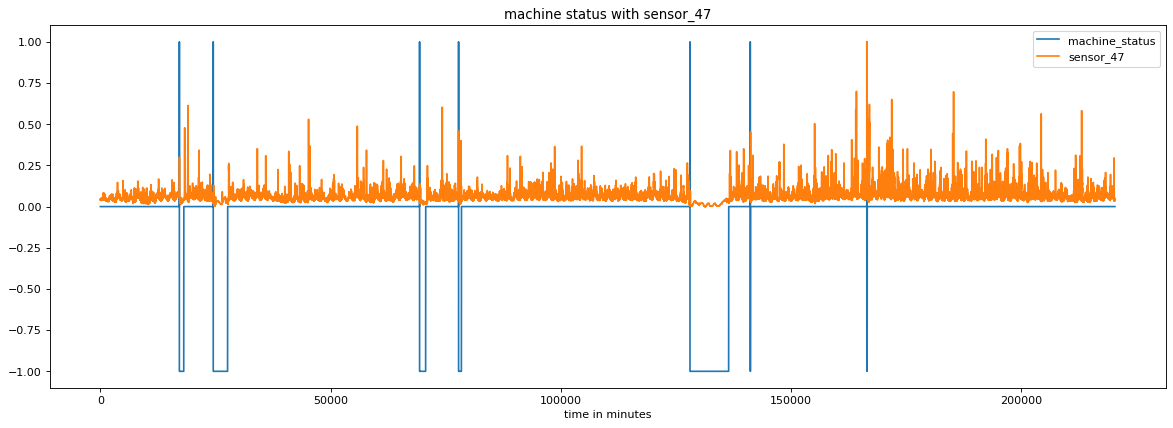

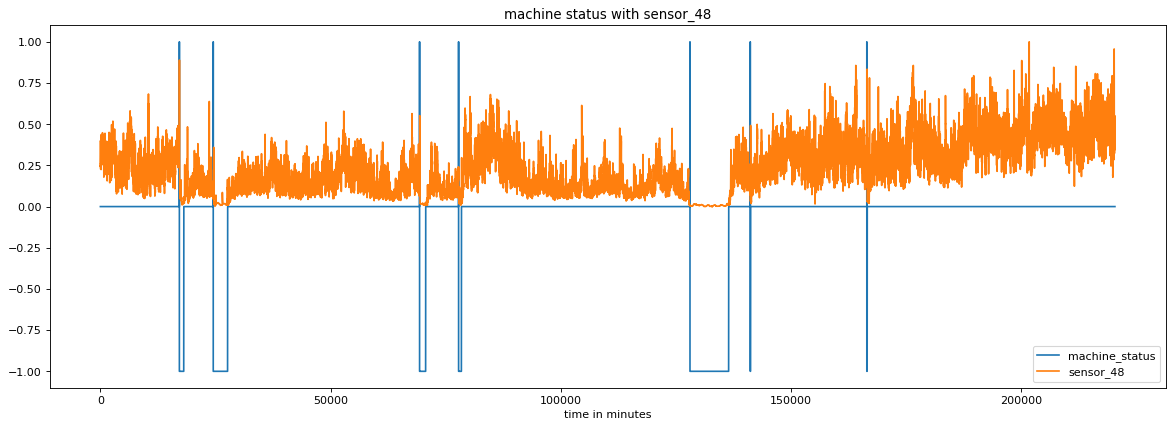

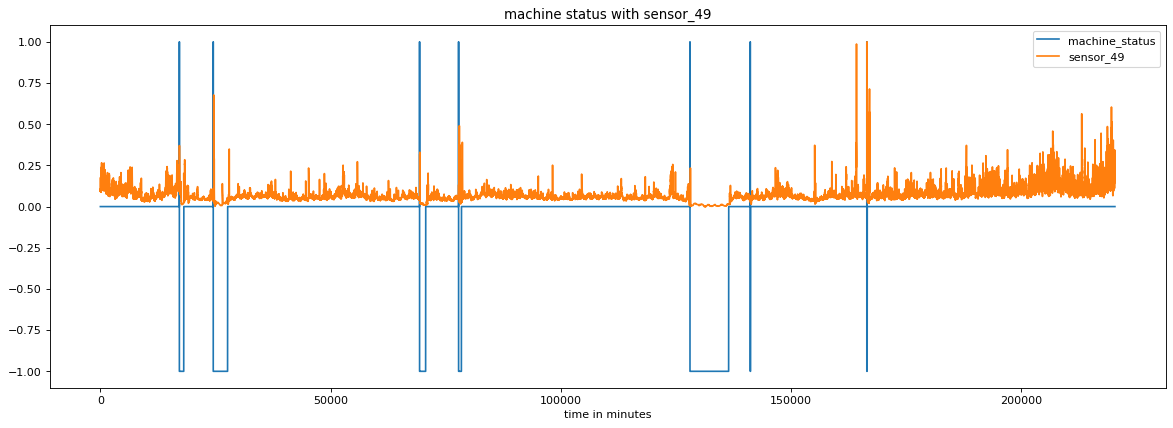

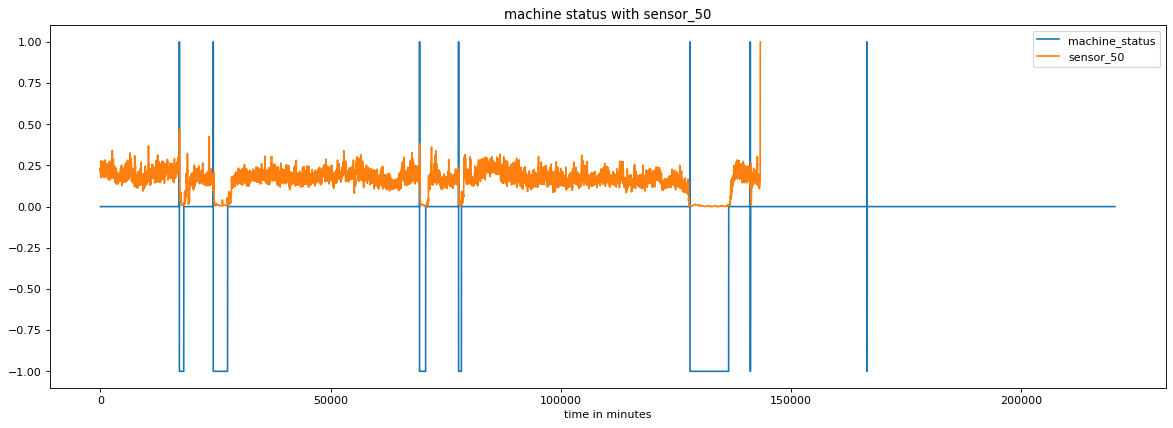

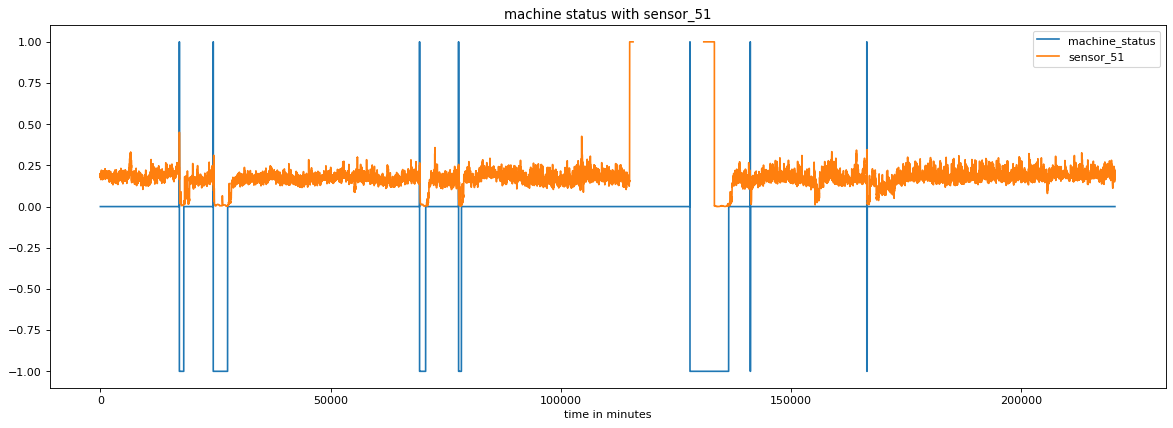

In [10]:
from sklearn.preprocessing import MinMaxScaler
for col in data.columns[1:-1]:
    scaler = MinMaxScaler()
    feat=scaler.fit_transform(data[col].values.reshape(-1, 1))
    fig=plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(df_temp['machine_status'],label='machine_status')
    plt.plot(feat,label=col)
    plt.xlabel('time in minutes')
    plt.legend()
    plt.title('machine status with {0}'.format(col))


- We can see for some sensor wherever the 'machine_status' become 1 means there is a failure, the sensor values suddenly fall to a minimum and it stayed minimum for whole recovering time.
- for some sensor we can see small variation with class label.
- for some sensor values are random, hence we will think on it to remove such sensors.